In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from scipy.stats import norm
import statistics

In [2]:
data = pd.read_csv("Obesity Survey (Responses).csv")

In [3]:
data.head()

,Timestamp,Gender,Email address,Age,Height,What is your height?( Numeric value in Feet and inches.EG:- 5.4),Weight,family_history_with_overweight,FAVC,FCVC,...,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,4-19-2024 3:36:54,Male,arpanmahto2003@gmail.com,22.0,1.767840,5.80,64.0,no,no,3,...,Sometimes,no,4.00,no,6,8.0,no,Public_Transportation,20.478308,Normal_Weight
1,4-19-2024 3:52:20,Male,krishnakanty058@gmail.com,21.0,1.737360,5.70,80.0,yes,no,4,...,Sometimes,no,5.00,no,5,10.0,no,Public_Transportation,26.503935,Overweight_Level_I
2,4-19-2024 10:29:07,Male,adityam958@gmail.com,69.0,1.688592,5.54,69.0,yes,yes,1,...,Always,no,1.00,no,7,14.0,no,Walking,24.199123,Normal_Weight
3,4-19-2024 10:29:45,Male,btech15064.20@bitmesra.ac.in,22.0,1.737360,5.70,68.0,no,yes,1,...,Sometimes,yes,3.75,no,4,4.0,Sometimes,Automobile,22.528344,Normal_Weight
4,4-19-2024 10:30:14,Male,shivamkishor1234@gmail.com,21.0,1.737360,5.70,64.5,no,no,3,...,Sometimes,no,3.00,no,7,14.0,no,Bike,21.368797,Normal_Weight


In [4]:
ap=data.copy()

In [5]:
ap.head()

,Timestamp,Gender,Email address,Age,Height,What is your height?( Numeric value in Feet and inches.EG:- 5.4),Weight,family_history_with_overweight,FAVC,FCVC,...,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI,NObeyesdad
0,4-19-2024 3:36:54,Male,arpanmahto2003@gmail.com,22.0,1.767840,5.80,64.0,no,no,3,...,Sometimes,no,4.00,no,6,8.0,no,Public_Transportation,20.478308,Normal_Weight
1,4-19-2024 3:52:20,Male,krishnakanty058@gmail.com,21.0,1.737360,5.70,80.0,yes,no,4,...,Sometimes,no,5.00,no,5,10.0,no,Public_Transportation,26.503935,Overweight_Level_I
2,4-19-2024 10:29:07,Male,adityam958@gmail.com,69.0,1.688592,5.54,69.0,yes,yes,1,...,Always,no,1.00,no,7,14.0,no,Walking,24.199123,Normal_Weight
3,4-19-2024 10:29:45,Male,btech15064.20@bitmesra.ac.in,22.0,1.737360,5.70,68.0,no,yes,1,...,Sometimes,yes,3.75,no,4,4.0,Sometimes,Automobile,22.528344,Normal_Weight
4,4-19-2024 10:30:14,Male,shivamkishor1234@gmail.com,21.0,1.737360,5.70,64.5,no,no,3,...,Sometimes,no,3.00,no,7,14.0,no,Bike,21.368797,Normal_Weight


In [6]:
ap.shape

(142, 21)

In [7]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Timestamp                                                         142 non-null    object 
 1   Gender                                                            142 non-null    object 
 2   Email address                                                     82 non-null     object 
 3   Age                                                               142 non-null    float64
 4   Height                                                            142 non-null    float64
 5   What is your height?( Numeric value in Feet and inches.EG:- 5.4)  142 non-null    float64
 6   Weight                                                            142 non-null    float64
 7   family_history_with_overweight     

In [8]:
ap.isnull().sum()

Timestamp                                                            0
Gender                                                               0
Email address                                                       60
Age                                                                  0
Height                                                               0
What is your height?( Numeric value in Feet and inches.EG:- 5.4)     0
Weight                                                               0
family_history_with_overweight                                       0
FAVC                                                                 0
FCVC                                                                 0
NCP                                                                  0
CAEC                                                                 0
SMOKE                                                                0
CH2O                                                                 0
SCC   

## Removing the unnecessary columns that are of no use

In [9]:
ap=ap.drop(columns=['Timestamp','Email address','What is your height?( Numeric value in Feet and inches.EG:- 5.4)','BMI'])

In [10]:
import pandas as pd
import numpy as np

# Load your CSV file into a DataFrame
#df = pd.read_csv('scores.csv')

# Drop rows with null values
ap.dropna(inplace=True)

# Number of rows you want to add to your dataset
desired_dataset_size =2113

# Initialize empty DataFrame for augmented data
augmented_data = pd.DataFrame(columns=ap.columns)

# Perform crossover to generate additional rows
for _ in range(desired_dataset_size):
    # Select two random samples from the dataset
    sample1 = ap.sample(n=1).iloc[0]
    sample2 = ap.sample(n=1).iloc[0]
    
    # Perform crossover by randomly selecting features from each parent
    new_sample = pd.Series([
        sample1[col] if np.random.rand() < 0.5 else sample2[col] for col in ap.columns],
        index=ap.columns
    )
    
    # Add the new sample to the augmented data
    augmented_data = pd.concat([augmented_data, new_sample.to_frame().T], ignore_index=True)

# Save the augmented dataset to a new CSV file
augmented_data.to_csv('augmented_dataset.csv', index=False)

# View the first few rows of the new dataset
print(augmented_data.head())

# View the shape of the new dataset
print(augmented_data.shape)


   Gender   Age   Height Weight family_history_with_overweight FAVC FCVC NCP  \
0    Male  20.0  1.73736   65.0                             no  yes    2   2   
1    Male  22.0  1.79832   58.0                             no   no    2   1   
2    Male  23.0  1.70688   65.0                             no   no    2   2   
3    Male  18.0  1.73736   58.0                            yes  yes    2   2   
4  Female  19.0  1.61544   48.0                            yes  yes    2   2   

         CAEC SMOKE CH2O  SCC FAF  TUE       CALC                 MTRANS  \
0   Sometimes    no  3.0   no   1  5.0         no  Public_Transportation   
1   Sometimes    no  3.0  yes   7  3.5         no                Walking   
2  Frequently    no  5.0   no   6  4.5         no  Public_Transportation   
3   Sometimes    no  3.5  yes   5  7.0  Sometimes                Walking   
4   Sometimes    no  3.0   no   7  4.5         no                Walking   

            NObeyesdad  
0        Normal_Weight  
1        Nor

In [11]:
augmented_data.duplicated().sum()

1

In [12]:
augmented_data.drop_duplicates(inplace=True)

In [13]:
augmented_data.shape

(2112, 17)

In [14]:
augmented_data.head(100)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,20.0,1.73736,65.0,no,yes,2,2,Sometimes,no,3.0,no,1,5.0,no,Public_Transportation,Normal_Weight
1,Male,22.0,1.79832,58.0,no,no,2,1,Sometimes,no,3.0,yes,7,3.5,no,Walking,Normal_Weight
2,Male,23.0,1.70688,65.0,no,no,2,2,Frequently,no,5.0,no,6,4.5,no,Public_Transportation,Normal_Weight
3,Male,18.0,1.73736,58.0,yes,yes,2,2,Sometimes,no,3.5,yes,5,7.0,Sometimes,Walking,Normal_Weight
4,Female,19.0,1.61544,48.0,yes,yes,2,2,Sometimes,no,3.0,no,7,4.5,no,Walking,Insufficient_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Female,22.0,1.58496,55.0,no,yes,2,2,no,no,3.0,no,2,4.0,no,Bike,Normal_Weight
96,Male,21.0,1.8288,74.0,no,no,2,3,Sometimes,no,3.0,no,5,5.0,no,Bike,Normal_Weight
97,Male,20.0,1.79832,54.0,no,yes,3,2,Sometimes,no,3.5,no,6,4.5,no,Public_Transportation,Normal_Weight
98,Male,21.0,1.55448,67.0,no,no,2,2,Sometimes,yes,3.5,no,0,4.5,Sometimes,Public_Transportation,Overweight_Level_II


In [15]:
ap=augmented_data.copy()

In [16]:
ap.reset_index(drop=True,inplace=True)

In [17]:
ap.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,20.0,1.73736,65.0,no,yes,2,2,Sometimes,no,3.0,no,1,5.0,no,Public_Transportation,Normal_Weight
1,Male,22.0,1.79832,58.0,no,no,2,1,Sometimes,no,3.0,yes,7,3.5,no,Walking,Normal_Weight
2,Male,23.0,1.70688,65.0,no,no,2,2,Frequently,no,5.0,no,6,4.5,no,Public_Transportation,Normal_Weight
3,Male,18.0,1.73736,58.0,yes,yes,2,2,Sometimes,no,3.5,yes,5,7.0,Sometimes,Walking,Normal_Weight
4,Female,19.0,1.61544,48.0,yes,yes,2,2,Sometimes,no,3.0,no,7,4.5,no,Walking,Insufficient_Weight


In [18]:
ap.shape

(2112, 17)

In [19]:
ap.duplicated().sum()

0

In [20]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2112 non-null   object
 1   Age                             2112 non-null   object
 2   Height                          2112 non-null   object
 3   Weight                          2112 non-null   object
 4   family_history_with_overweight  2112 non-null   object
 5   FAVC                            2112 non-null   object
 6   FCVC                            2112 non-null   object
 7   NCP                             2112 non-null   object
 8   CAEC                            2112 non-null   object
 9   SMOKE                           2112 non-null   object
 10  CH2O                            2112 non-null   object
 11  SCC                             2112 non-null   object
 12  FAF                             2112 non-null   

In [21]:
ap['Age'].value_counts().head(40)

Age
20.0    525
21.0    490
22.0    374
18.0    241
19.0    240
23.0    144
26.0     32
69.0     23
24.0     15
17.5     14
25.0     14
Name: count, dtype: int64

## Graphical Analysis of the data

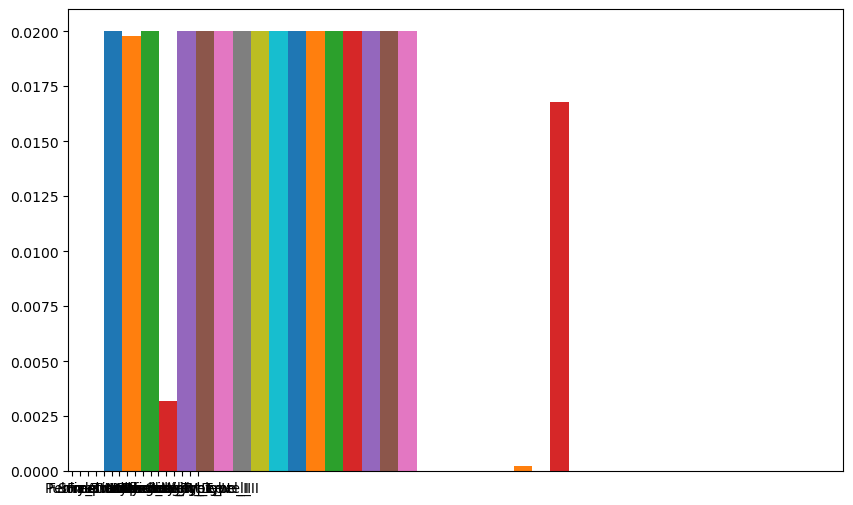

In [22]:
plt.figure(figsize=(10, 6)) 
plt.hist(ap,bins=2,density=True,alpha=1)
plt.show()

/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The 

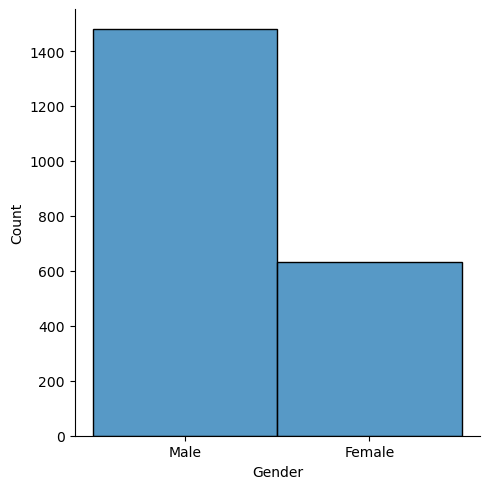

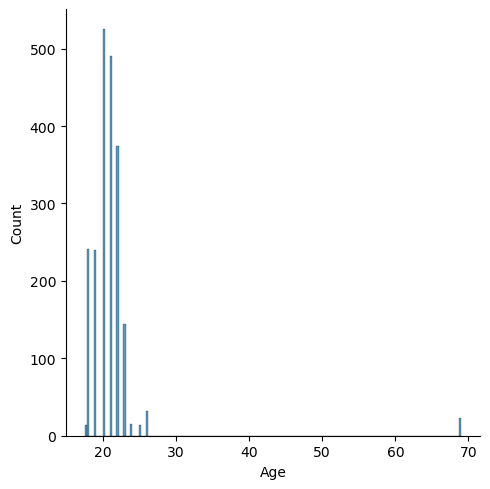

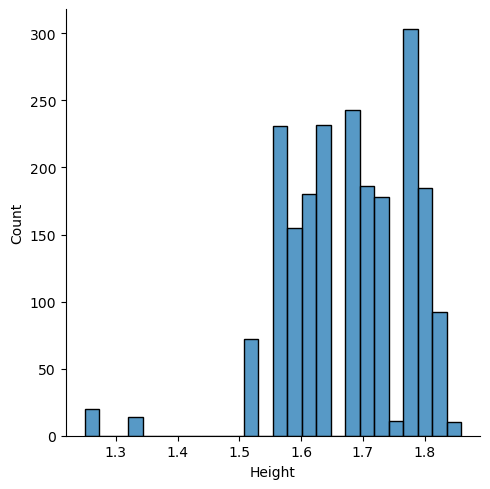

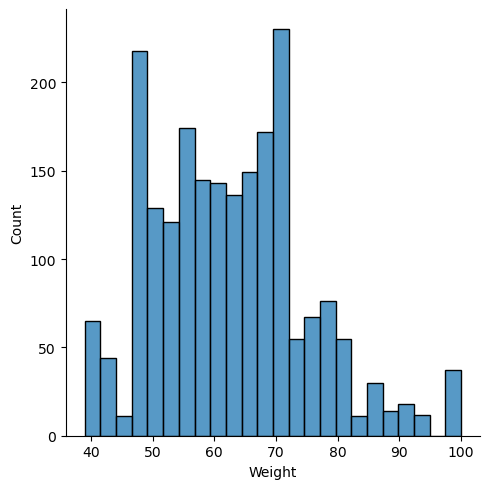

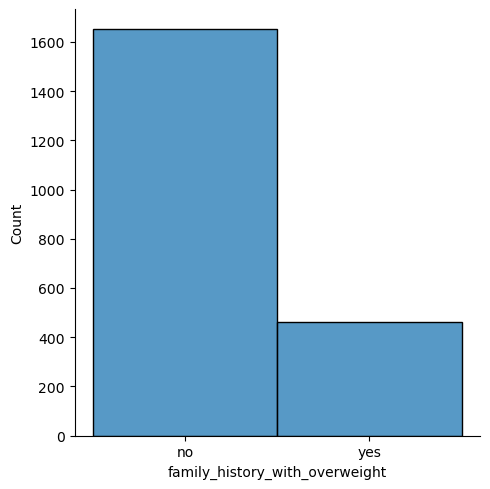

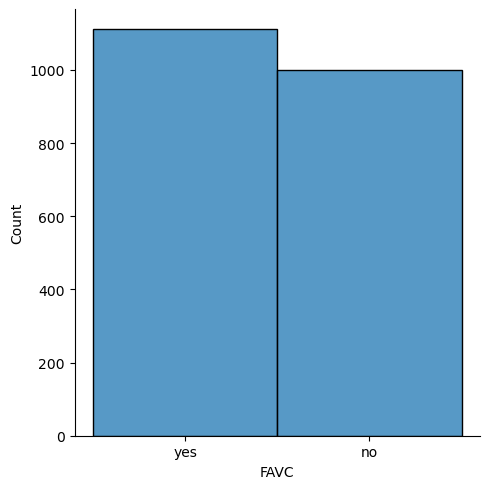

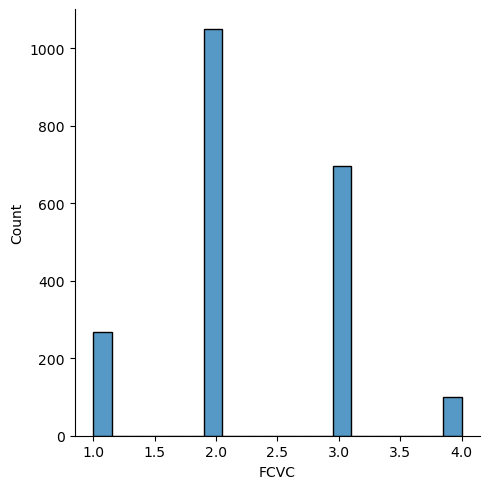

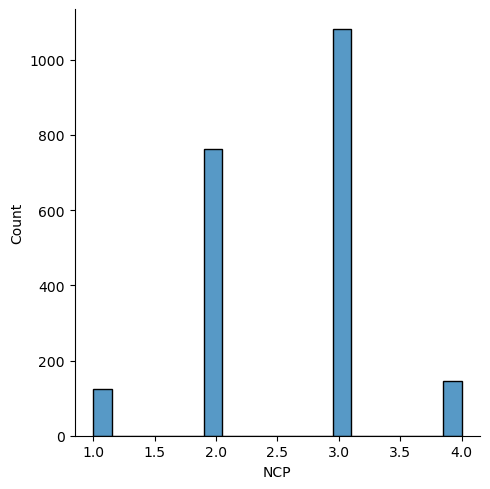

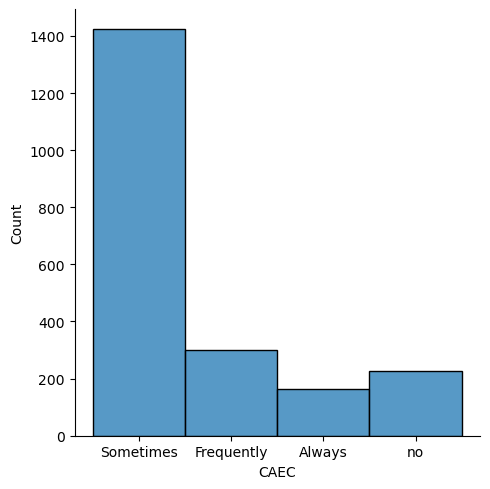

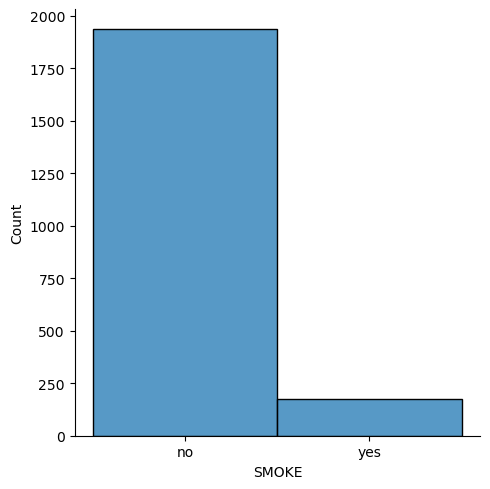

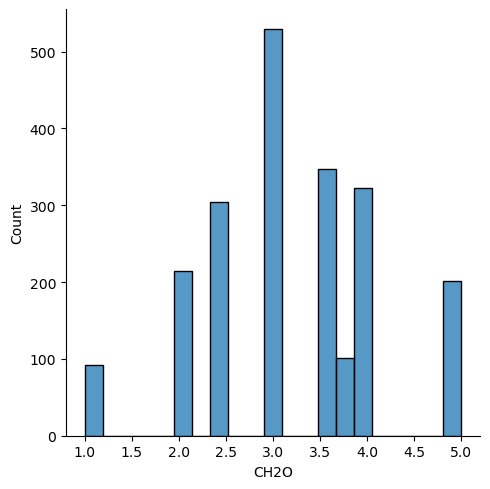

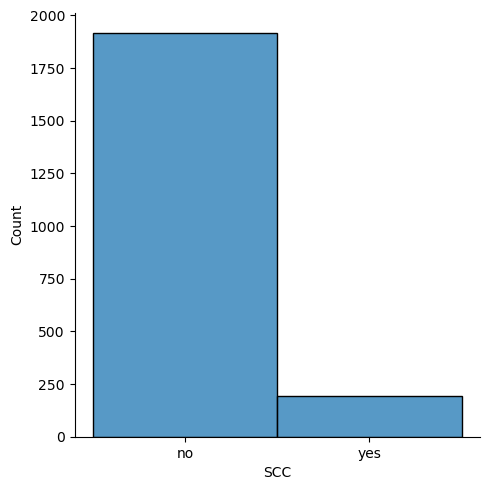

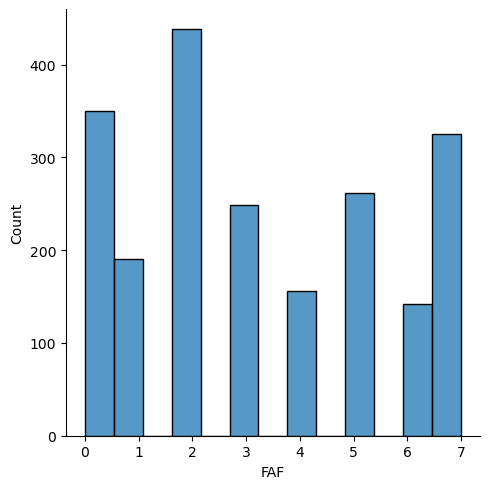

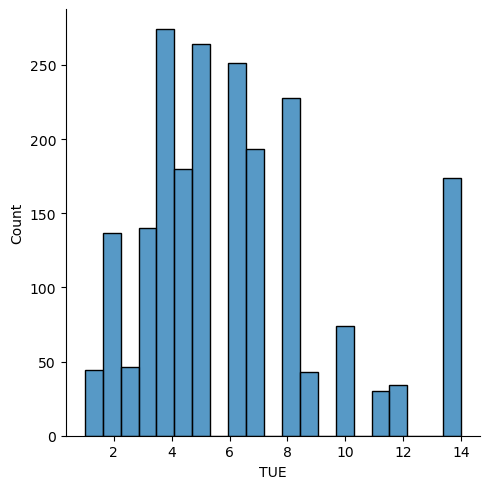

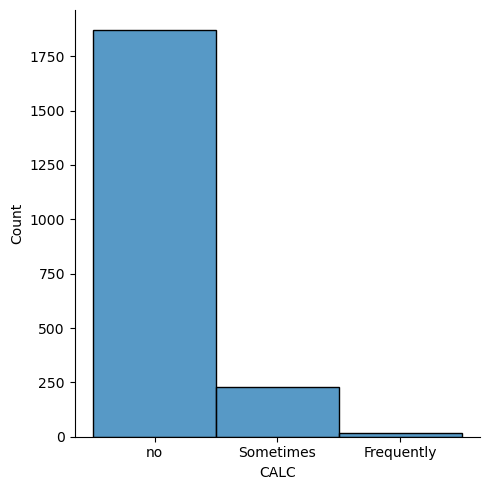

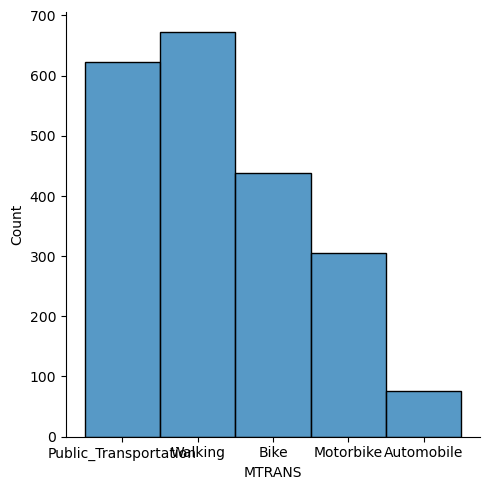

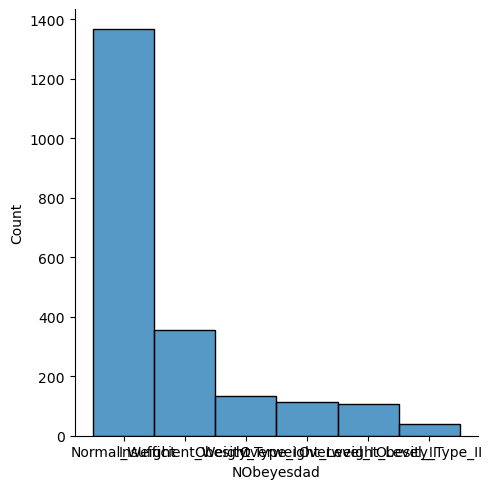

In [23]:
for columns in ap:
 sns.displot(x=columns,data=ap)

/Users/pritikumari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


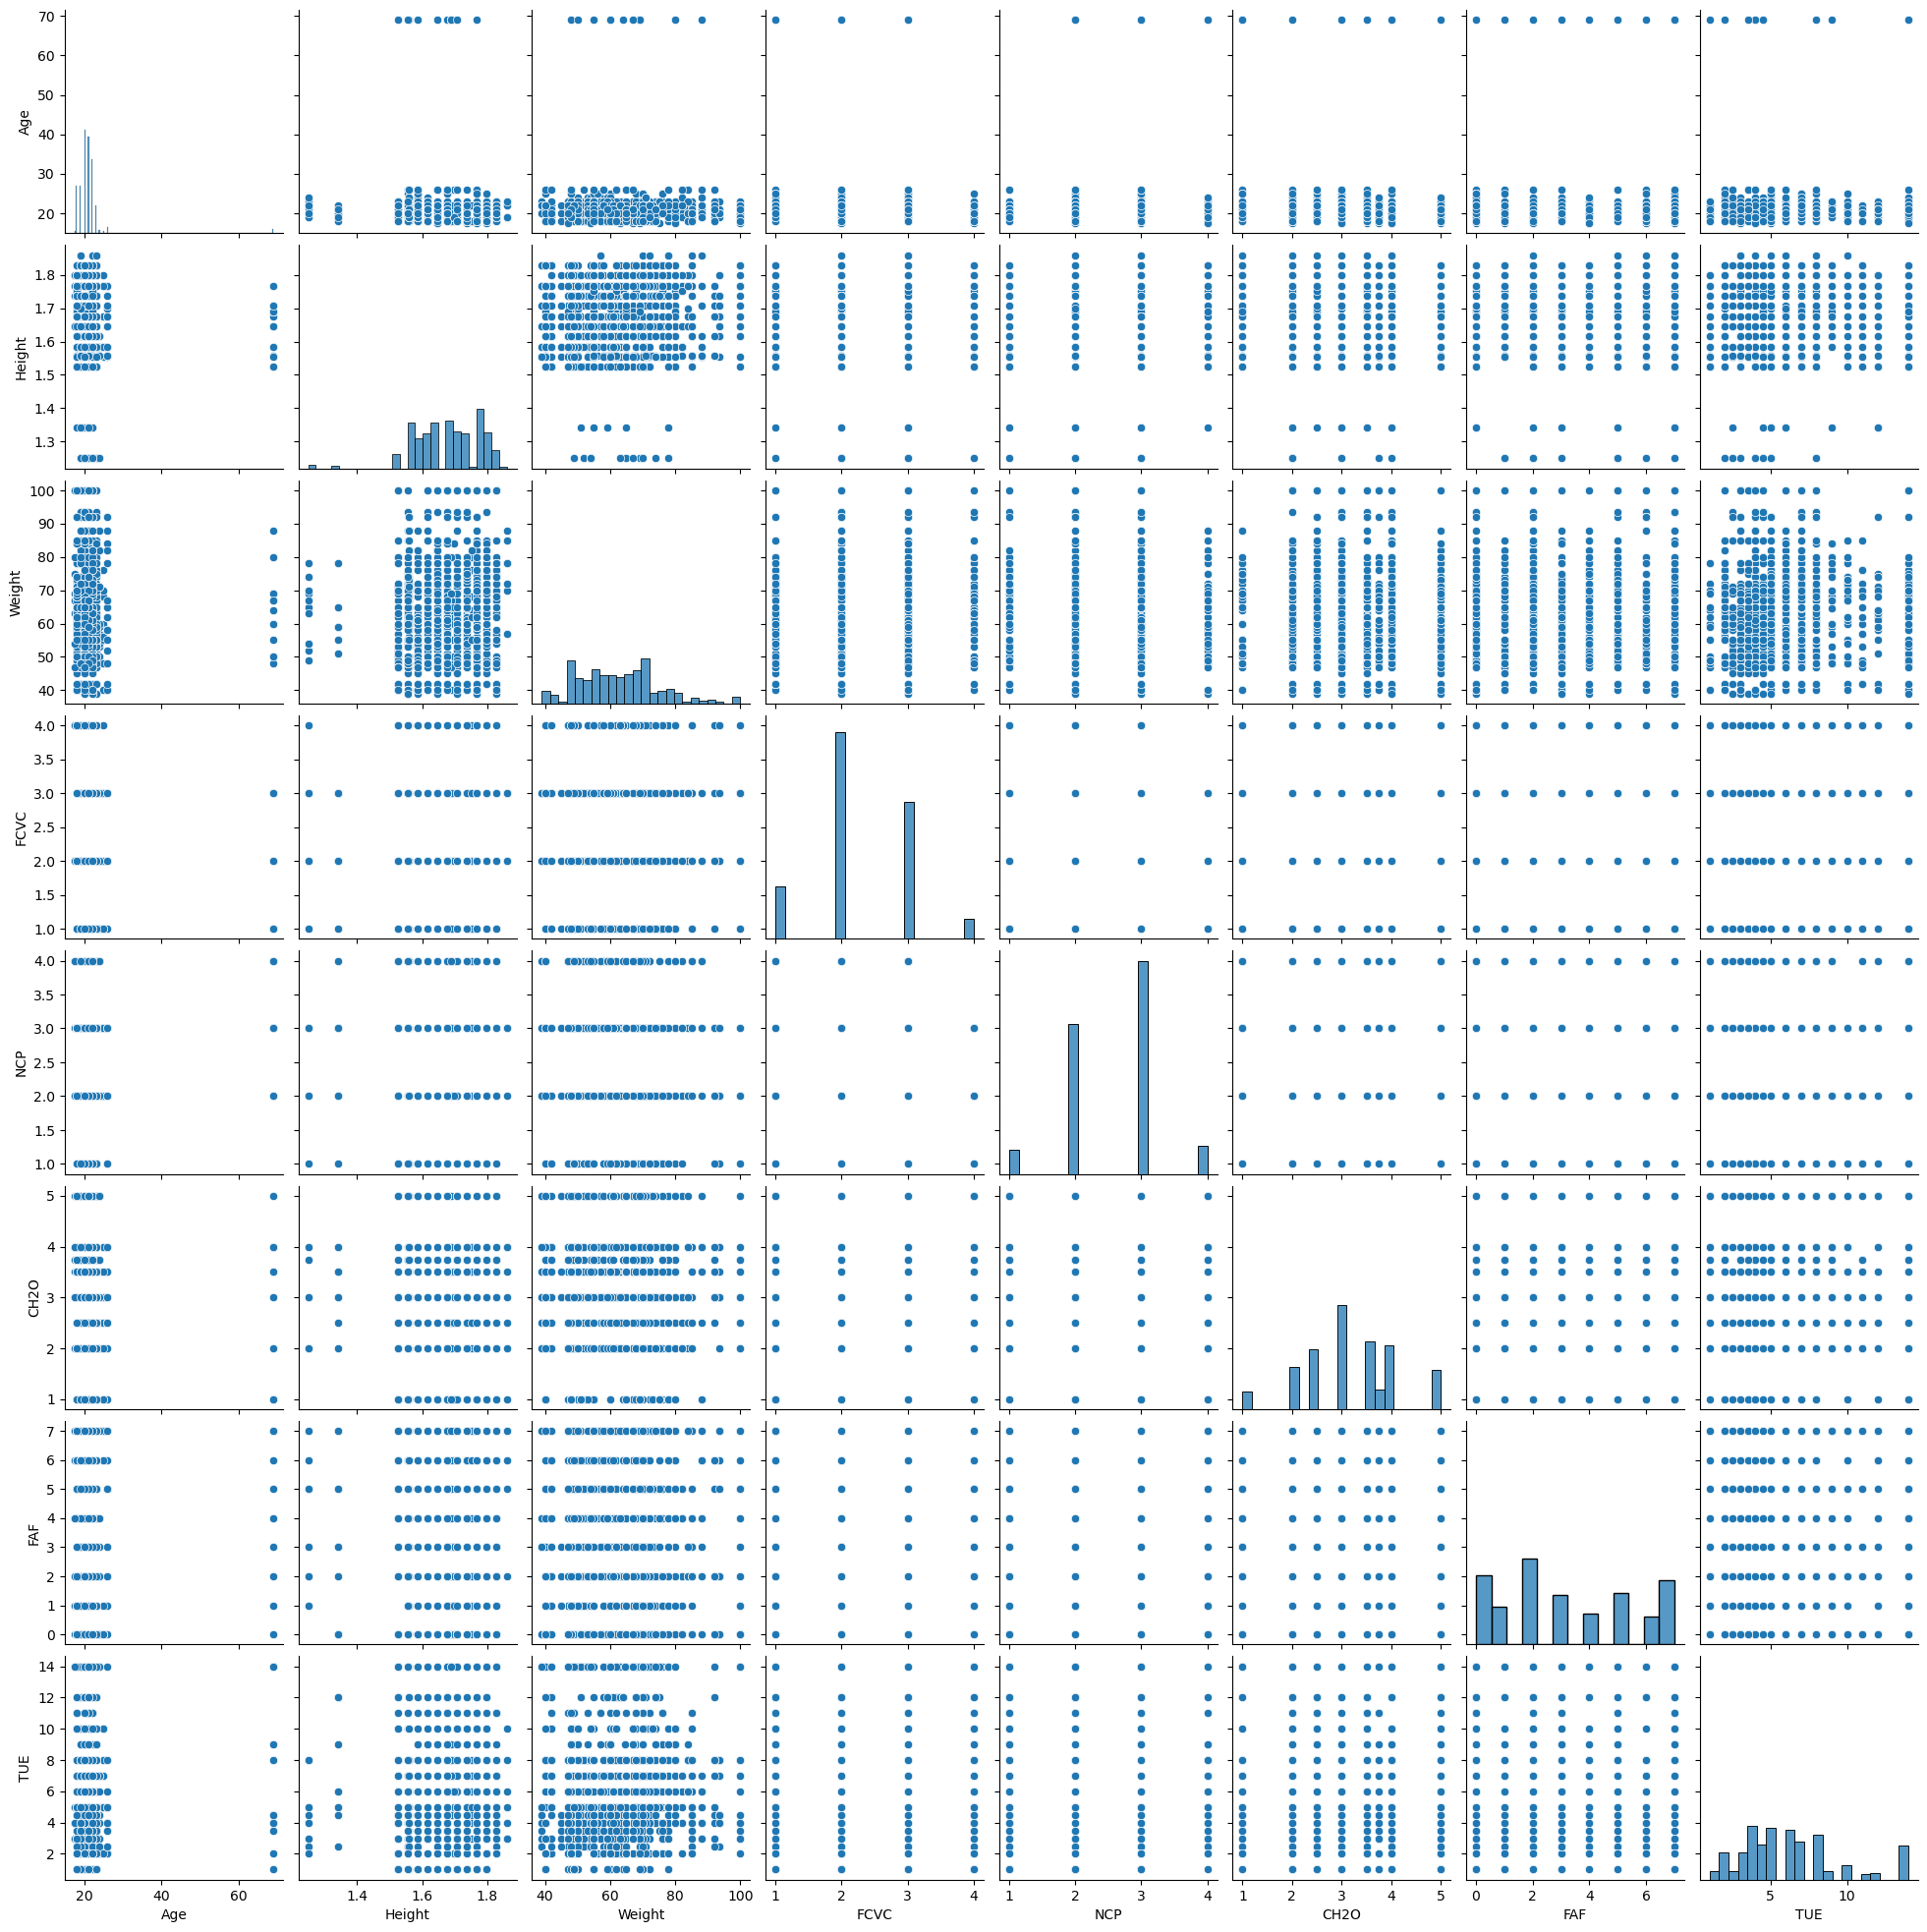

In [24]:
sns.pairplot(ap)

# Univariate Analysis

In [25]:
ap['NObeyesdad'].value_counts(normalize='True')

NObeyesdad
Normal_Weight          0.646780
Insufficient_Weight    0.168561
Obesity_Type_I         0.062500
Overweight_Level_I     0.053030
Overweight_Level_II    0.050189
Obesity_Type_II        0.018939
Name: proportion, dtype: float64

<Axes: xlabel='NObeyesdad'>

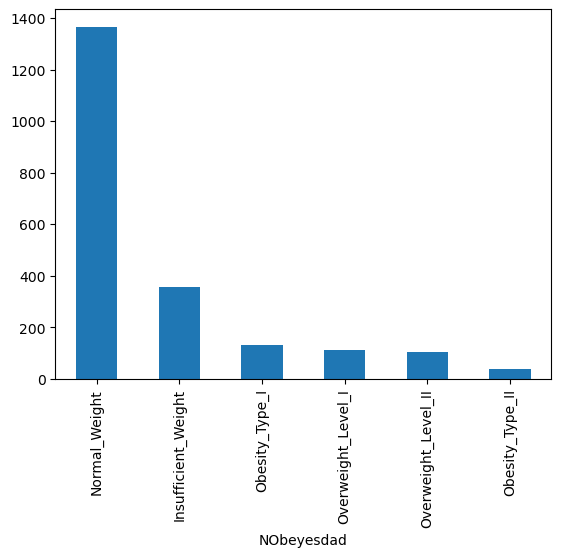

In [26]:
ap['NObeyesdad'].value_counts().plot.bar()

<Axes: xlabel='NObeyesdad'>

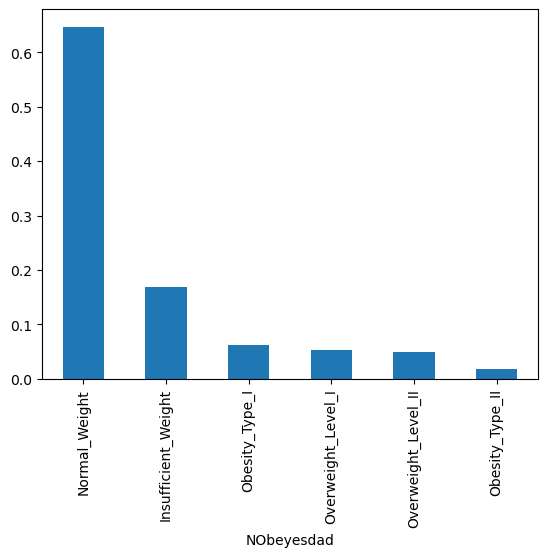

In [27]:
ap['NObeyesdad'].value_counts(normalize='True').plot.bar()

<Axes: xlabel='NObeyesdad', ylabel='count'>

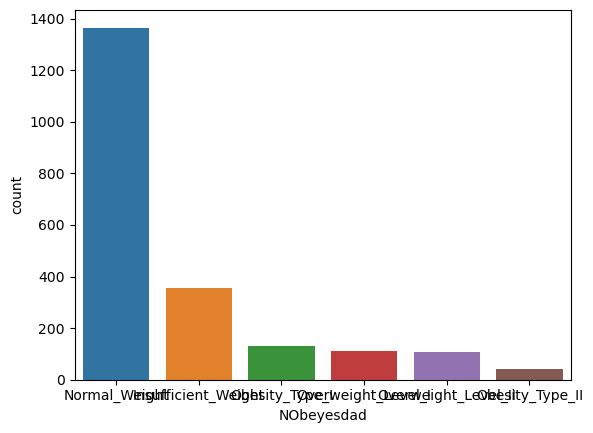

In [28]:
sns.countplot(x='NObeyesdad',data=ap)

# Independent Variable (Categorical) using seaborn

<Axes: xlabel='MTRANS', ylabel='count'>

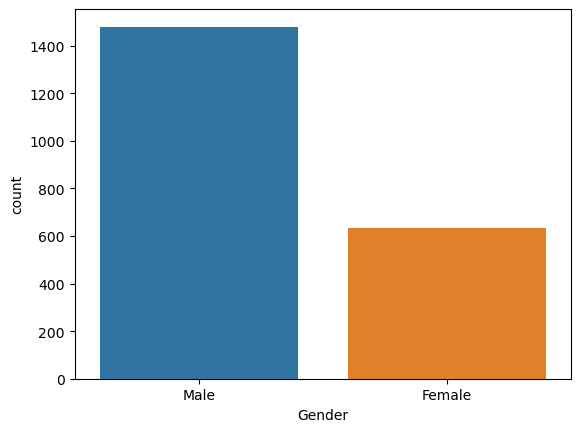

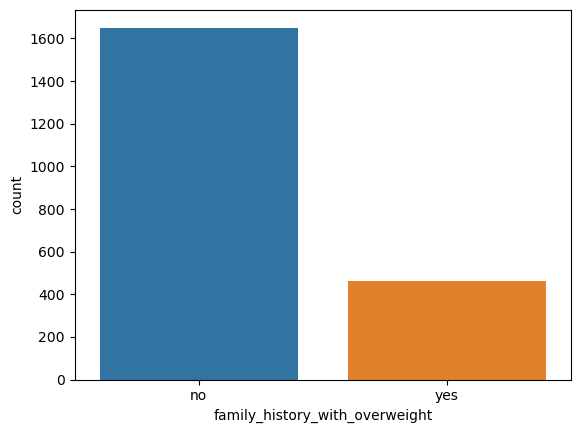

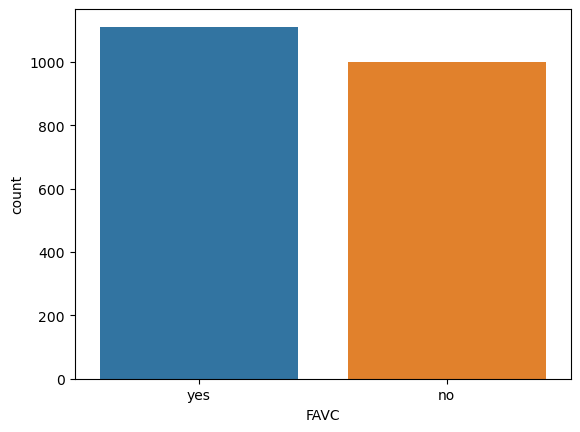

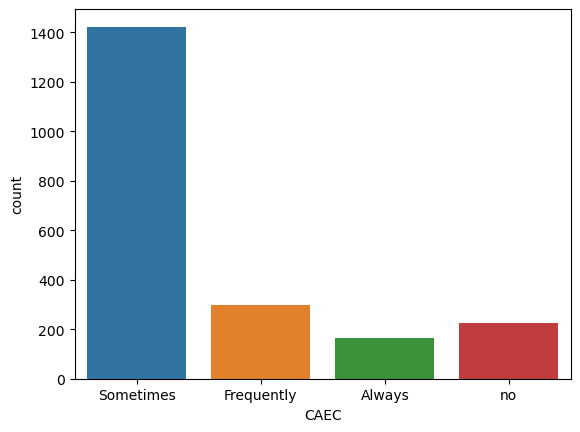

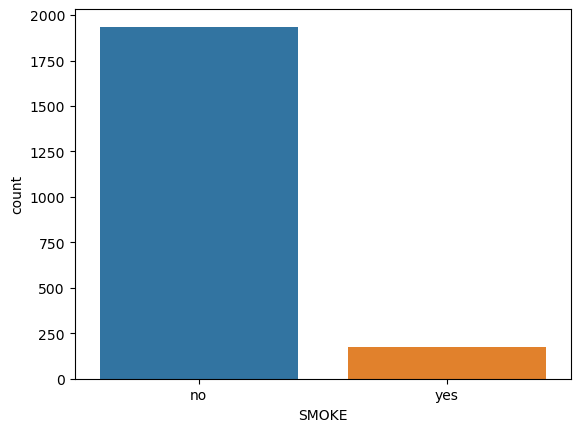

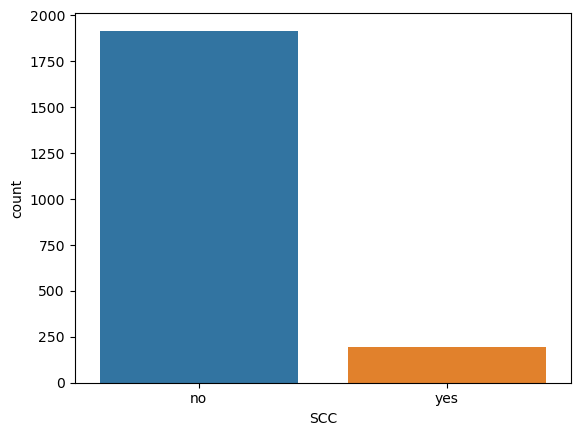

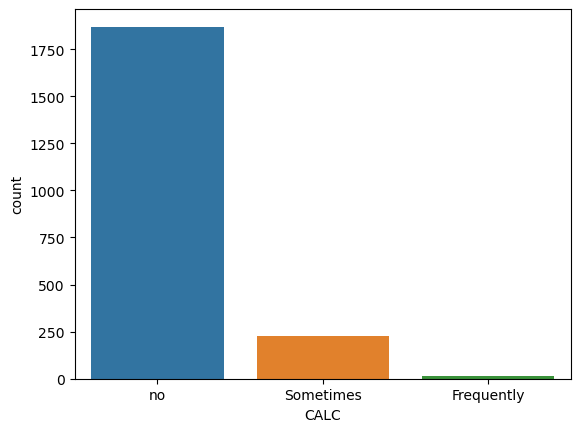

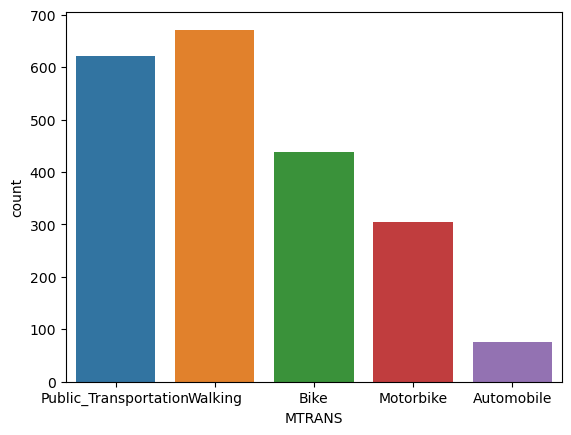

In [29]:
plt.figure(1)
plt.subplot(111)
sns.countplot(x='Gender',data=ap)
plt.figure(2)
plt.subplot(111)
sns.countplot(x='family_history_with_overweight',data=ap)
plt.figure(3)
plt.subplot(111)
sns.countplot(x='FAVC',data=ap)
plt.figure(4)
plt.subplot(111)
sns.countplot(x='CAEC',data=ap)
plt.figure(5)
plt.subplot(111)
sns.countplot(x='SMOKE',data=ap)
plt.figure(6)
plt.subplot(111)
sns.countplot(x='SCC',data=ap)
plt.figure(7)
plt.subplot(111)
sns.countplot(x='CALC',data=ap)
plt.figure(8)
plt.subplot(111)
sns.countplot(x='MTRANS',data=ap)

## Bivariate Analysis

### continuous vs Categorical

<Axes: xlabel='NObeyesdad', ylabel='Age'>

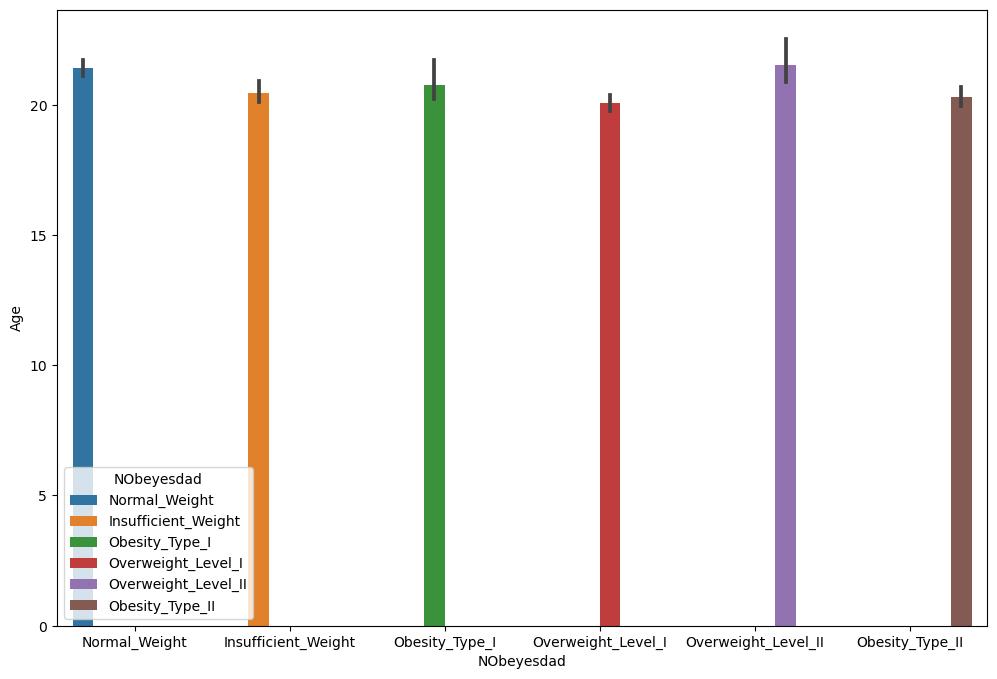

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Age',x='NObeyesdad',hue='NObeyesdad')

In [31]:
ap.groupby(['Age', 'NObeyesdad']).size()

Age   NObeyesdad         
17.5  Normal_Weight           10
      Obesity_Type_I           1
      Overweight_Level_I       3
18.0  Insufficient_Weight     69
      Normal_Weight          133
      Obesity_Type_I          15
      Obesity_Type_II          1
      Overweight_Level_I      16
      Overweight_Level_II      7
19.0  Insufficient_Weight     34
      Normal_Weight          134
      Obesity_Type_I          23
      Obesity_Type_II         11
      Overweight_Level_I      26
      Overweight_Level_II     12
20.0  Insufficient_Weight     98
      Normal_Weight          355
      Obesity_Type_I          27
      Obesity_Type_II          8
      Overweight_Level_I      24
      Overweight_Level_II     13
21.0  Insufficient_Weight     93
      Normal_Weight          295
      Obesity_Type_I          34
      Obesity_Type_II         15
      Overweight_Level_I      28
      Overweight_Level_II     25
22.0  Insufficient_Weight     43
      Normal_Weight          260
      Obesity_Typ

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

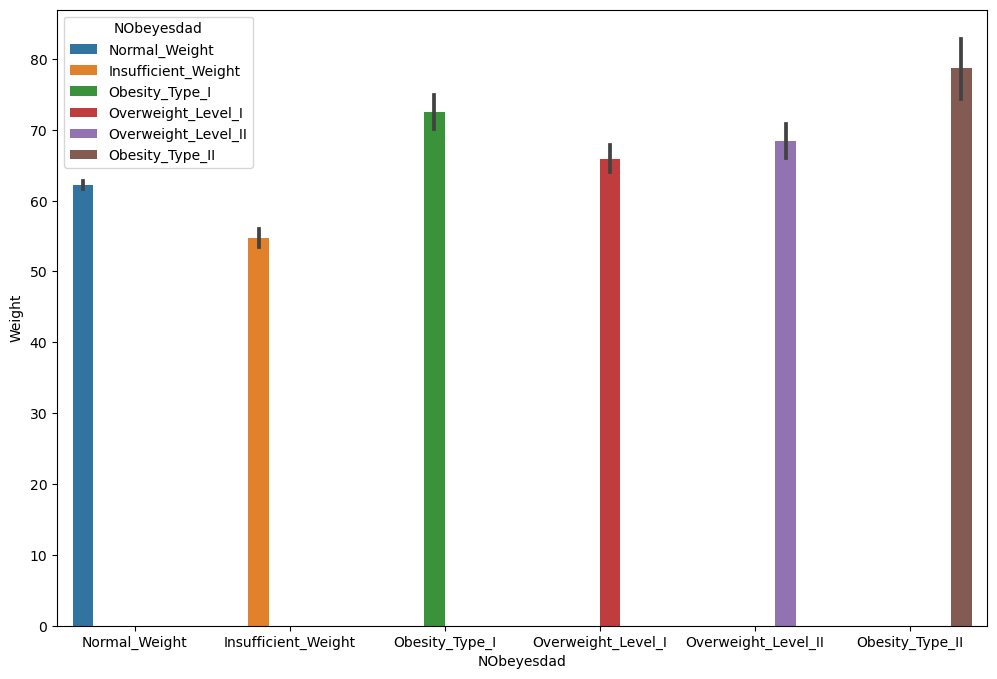

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Weight',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='Height'>

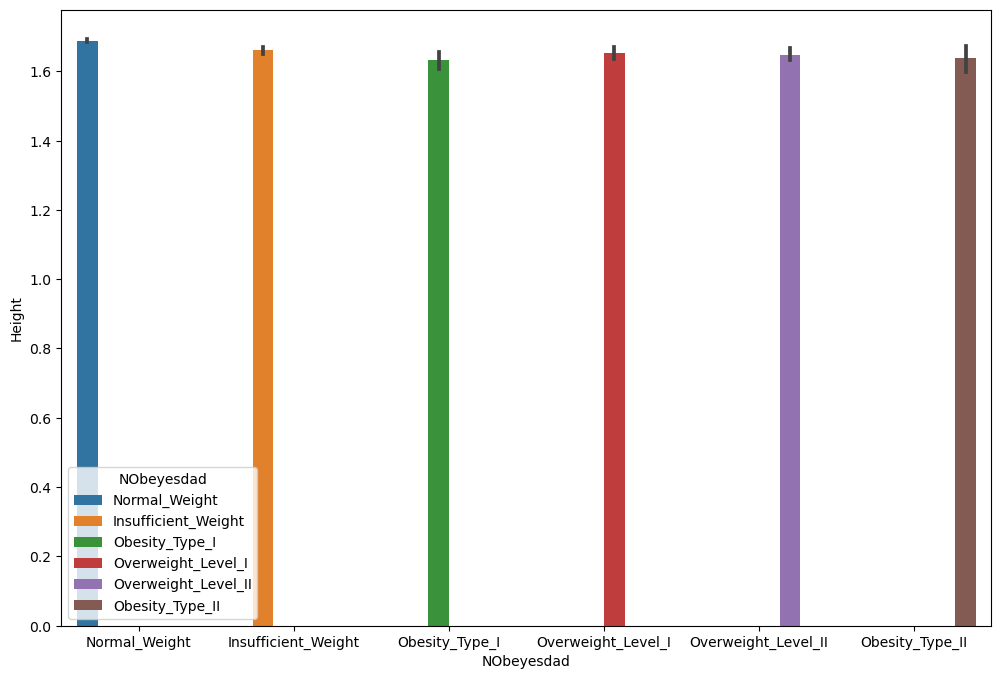

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='Height',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='FCVC'>

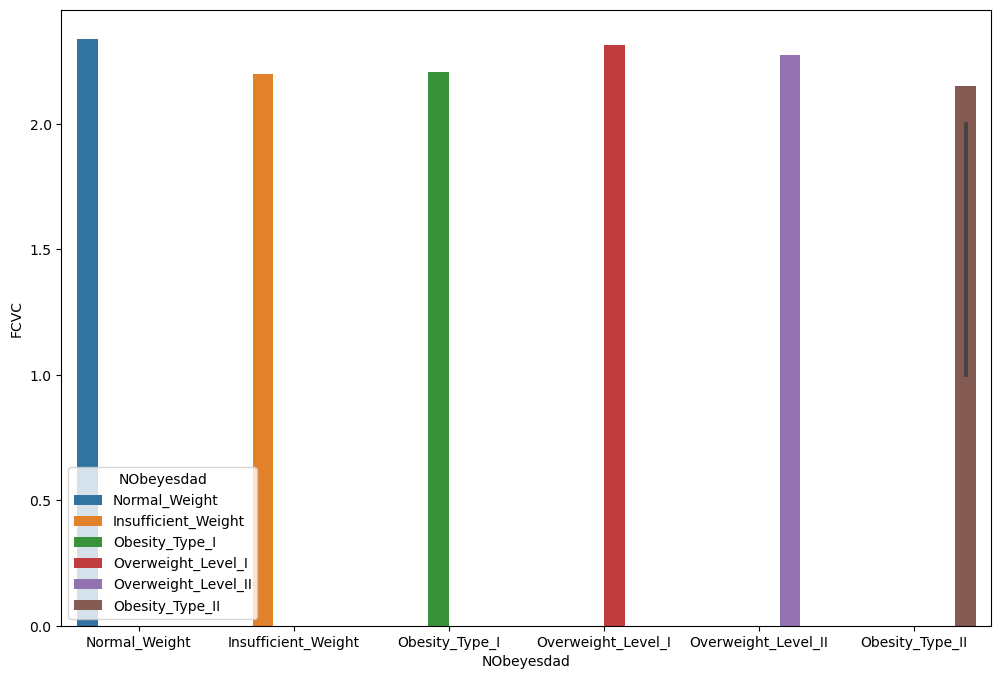

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='FCVC',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='NCP'>

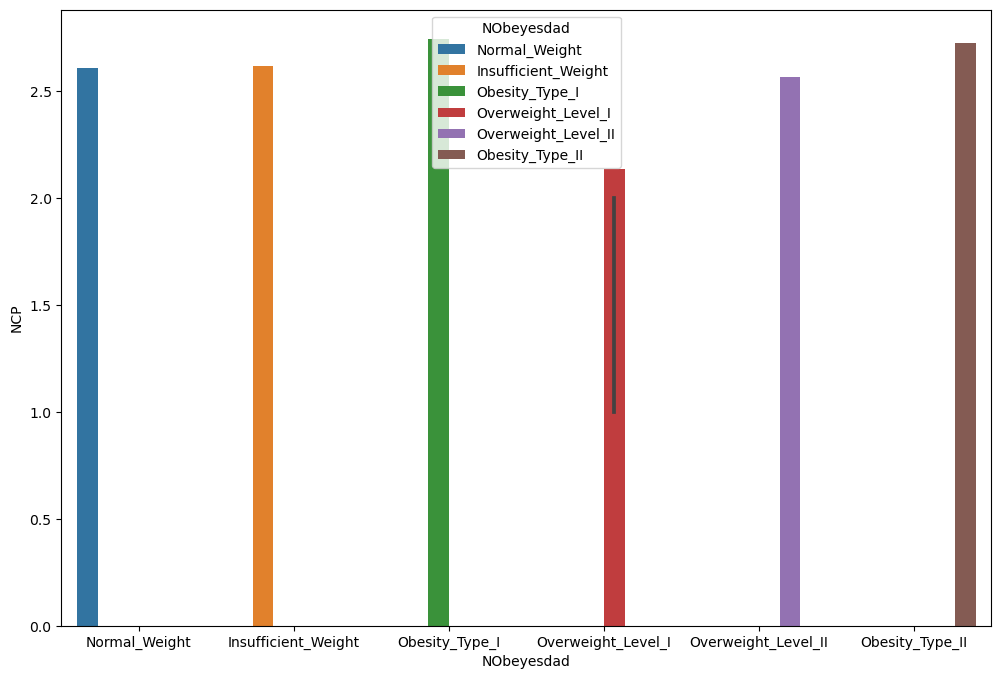

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='NCP',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='CH2O'>

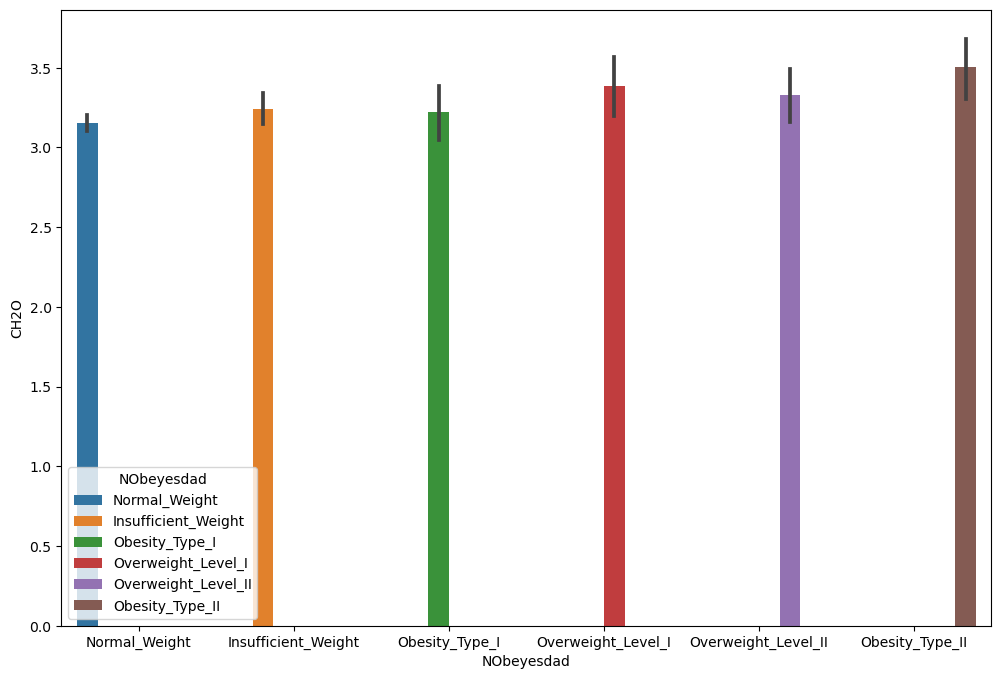

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(data=ap,y='CH2O',x='NObeyesdad',hue='NObeyesdad')

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

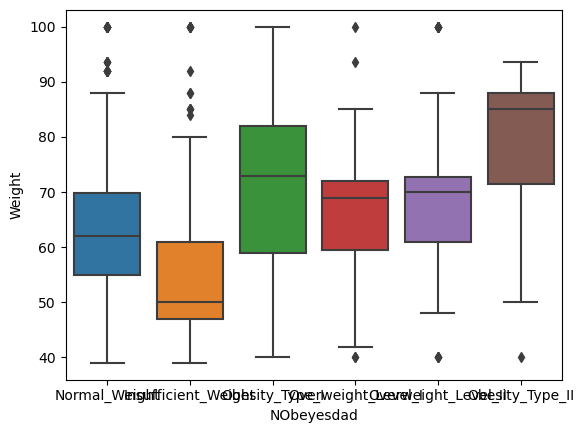

In [37]:
sns.boxplot(data=ap,y='Weight',x='NObeyesdad')

# categorical vs Categorical

<Axes: xlabel='Gender', ylabel='count'>

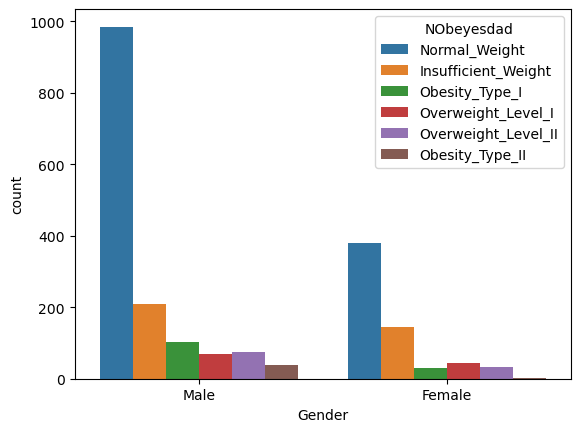

In [38]:
sns.countplot(data=ap,x='Gender',hue='NObeyesdad')
#if we want to stack this then we have to use crosstab and heatmap

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

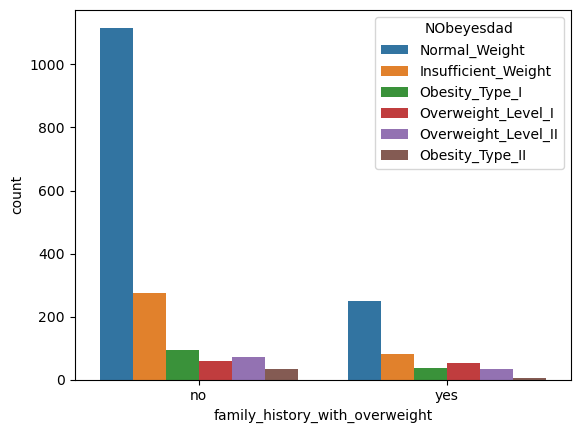

In [39]:
sns.countplot(data=ap,x='family_history_with_overweight',hue='NObeyesdad')

<Axes: xlabel='FAVC', ylabel='count'>

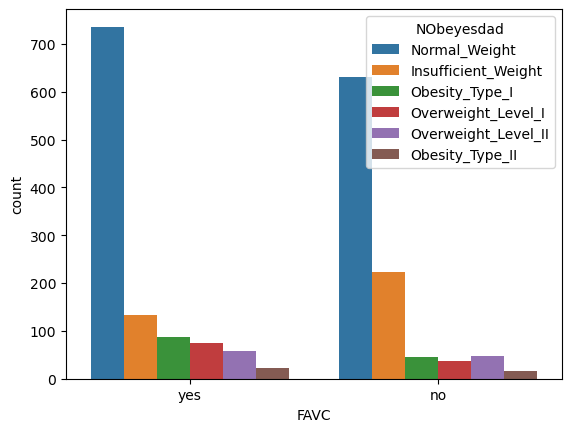

In [40]:
sns.countplot(data=ap,x='FAVC',hue='NObeyesdad')

<Axes: xlabel='CAEC', ylabel='count'>

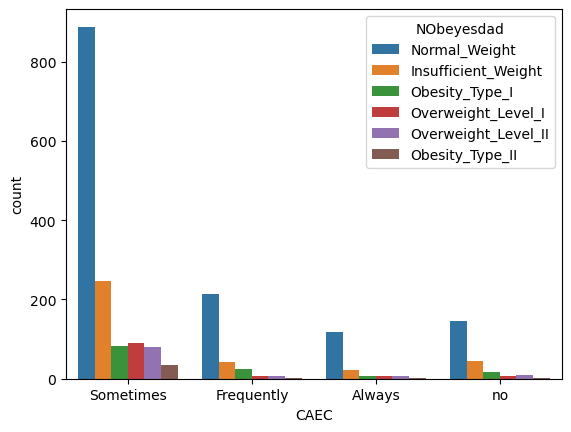

In [41]:
sns.countplot(data=ap,x='CAEC',hue='NObeyesdad')

<Axes: xlabel='SMOKE', ylabel='count'>

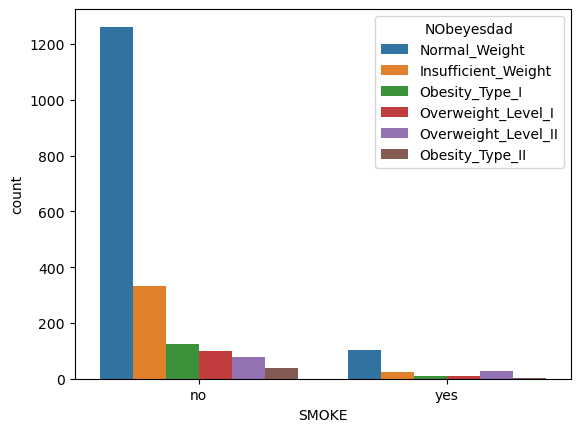

In [42]:
sns.countplot(data=ap,x='SMOKE',hue='NObeyesdad')

<Axes: xlabel='SCC', ylabel='count'>

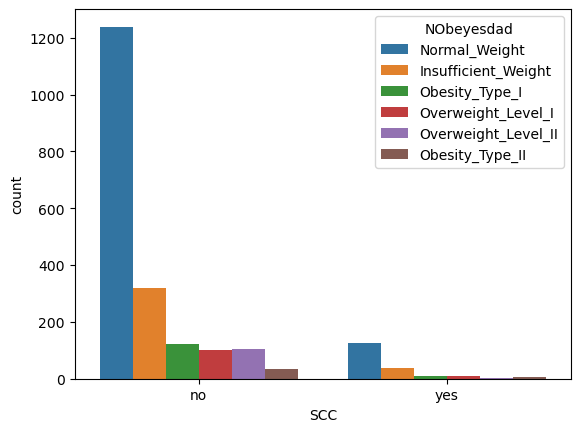

In [43]:
sns.countplot(data=ap,x='SCC',hue='NObeyesdad')

<Axes: xlabel='CALC', ylabel='count'>

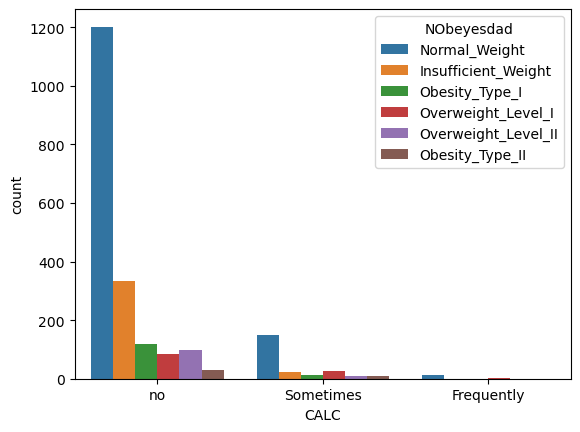

In [44]:
sns.countplot(data=ap,x='CALC',hue='NObeyesdad')

<Axes: xlabel='MTRANS', ylabel='count'>

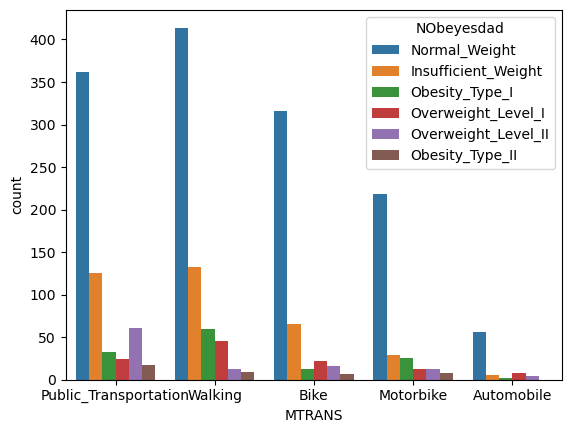

In [45]:
sns.countplot(data=ap,x='MTRANS',hue='NObeyesdad')

In [46]:
ap['Gender'].value_counts()

Gender
Male      1479
Female     633
Name: count, dtype: int64

In [47]:
label_encode=LabelEncoder()
bbb=label_encode.fit_transform(ap['Gender'])
print(bbb)
ap['Gender']=bbb

[1 1 1 ... 1 1 1]


In [48]:
ap['Gender'].value_counts()

Gender
1    1479
0     633
Name: count, dtype: int64

In [49]:
ap['family_history_with_overweight'].value_counts()

family_history_with_overweight
no     1651
yes     461
Name: count, dtype: int64

In [50]:
bbb=label_encode.fit_transform(ap['family_history_with_overweight'])
print(bbb)
ap['family_history_with_overweight']=bbb
ap['family_history_with_overweight'].value_counts()

[0 0 0 ... 1 1 0]


family_history_with_overweight
0    1651
1     461
Name: count, dtype: int64

In [51]:
ap['FAVC'].value_counts()

FAVC
yes    1111
no     1001
Name: count, dtype: int64

In [52]:
bbb=label_encode.fit_transform(ap['FAVC'])
print(bbb)
ap['FAVC']=bbb
ap['FAVC'].value_counts()

[1 0 0 ... 0 1 0]


FAVC
1    1111
0    1001
Name: count, dtype: int64

In [53]:
ap['CAEC'].value_counts()

CAEC
Sometimes     1423
Frequently     300
no             226
Always         163
Name: count, dtype: int64

In [54]:
bbb=label_encode.fit_transform(ap['CAEC'])
print(bbb)
ap['CAEC']=bbb
ap['CAEC'].value_counts()

[2 2 1 ... 0 0 3]


CAEC
2    1423
1     300
3     226
0     163
Name: count, dtype: int64

In [55]:

ap['SMOKE'].value_counts()

SMOKE
no     1936
yes     176
Name: count, dtype: int64

In [56]:
bbb=label_encode.fit_transform(ap['SMOKE'])
print(bbb)
ap['SMOKE']=bbb
ap['SMOKE'].value_counts()

[0 0 0 ... 0 1 0]


SMOKE
0    1936
1     176
Name: count, dtype: int64

In [57]:
ap['SCC'].value_counts()

SCC
no     1917
yes     195
Name: count, dtype: int64

In [58]:
bbb=label_encode.fit_transform(ap['SCC'])
print(bbb)
ap['SCC']=bbb
ap['SCC'].value_counts()

[0 1 0 ... 0 0 0]


SCC
0    1917
1     195
Name: count, dtype: int64

In [59]:
ap['CALC'].value_counts()

CALC
no            1869
Sometimes      228
Frequently      15
Name: count, dtype: int64

In [60]:
bbb=label_encode.fit_transform(ap['CALC'])
print(bbb)
ap['CALC']=bbb
ap['CALC'].value_counts()

[2 2 2 ... 2 2 2]


CALC
2    1869
1     228
0      15
Name: count, dtype: int64

In [61]:
ap['MTRANS'].value_counts()

MTRANS
Walking                  672
Public_Transportation    622
Bike                     438
Motorbike                305
Automobile                75
Name: count, dtype: int64

In [62]:
bbb=label_encode.fit_transform(ap['MTRANS'])
print(bbb)
ap['MTRANS']=bbb
ap['MTRANS'].value_counts()

[3 4 3 ... 1 4 1]


MTRANS
4    672
3    622
1    438
2    305
0     75
Name: count, dtype: int64

In [63]:
ap['NObeyesdad'].value_counts()

NObeyesdad
Normal_Weight          1366
Insufficient_Weight     356
Obesity_Type_I          132
Overweight_Level_I      112
Overweight_Level_II     106
Obesity_Type_II          40
Name: count, dtype: int64

In [64]:
bbb=label_encode.fit_transform(ap['NObeyesdad'])
print(bbb)
ap['NObeyesdad']=bbb
ap['NObeyesdad'].value_counts()

[1 1 1 ... 1 5 1]


NObeyesdad
1    1366
0     356
2     132
4     112
5     106
3      40
Name: count, dtype: int64

<Axes: >

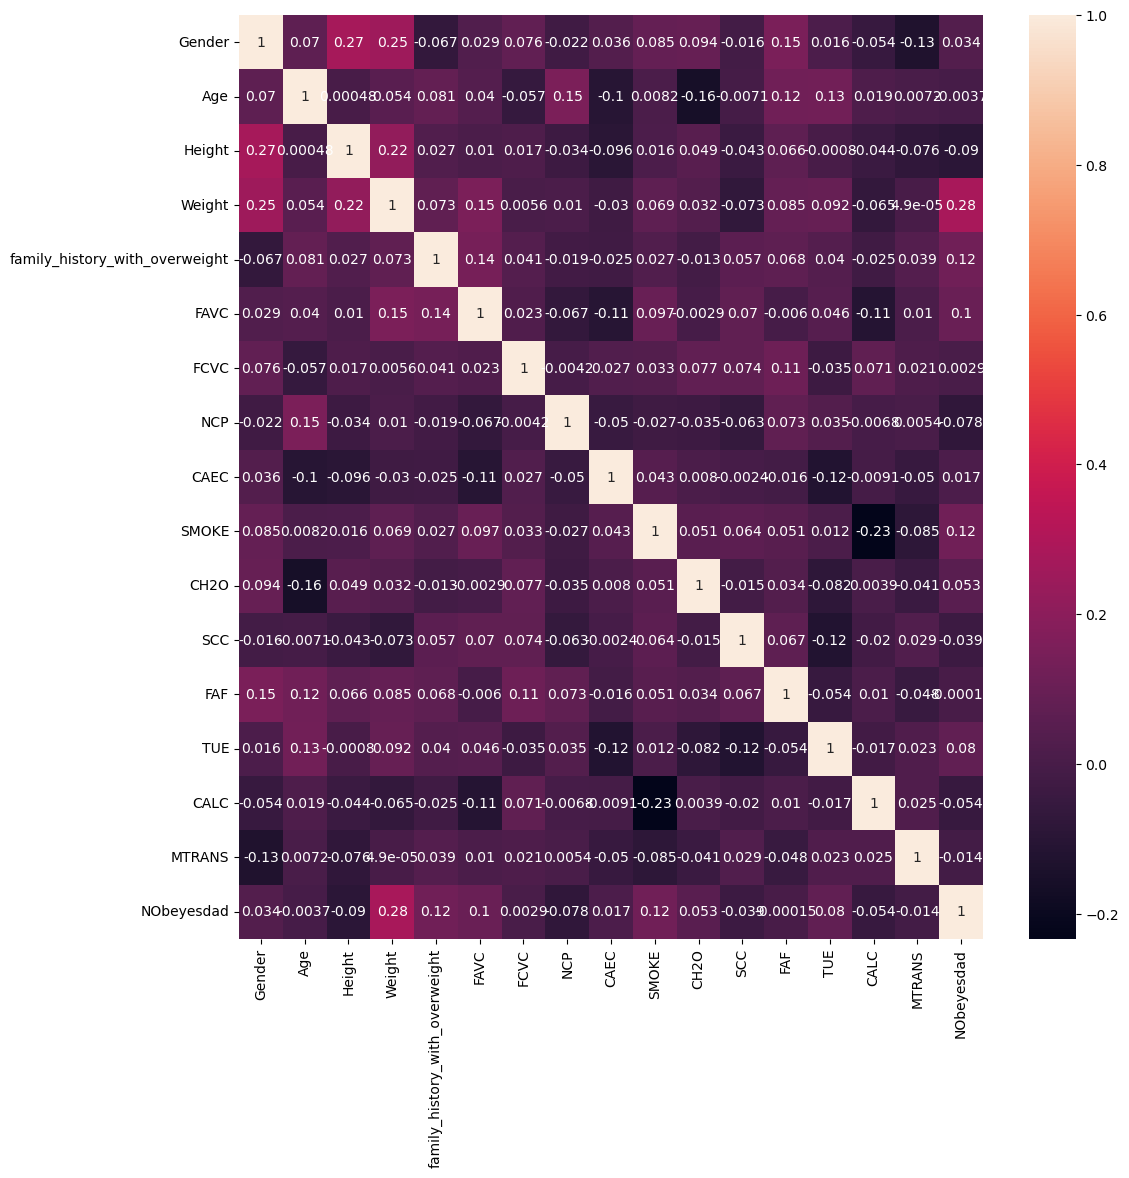

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(ap.corr(),annot=True)

In [66]:
X=ap.drop('NObeyesdad',axis=1)

In [67]:
Y=ap['NObeyesdad']

In [68]:
import imblearn

In [69]:
#import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [70]:
X_resampled.shape, y_resampled.shape

((8196, 16), (8196,))

In [71]:
y_resampled.value_counts()

NObeyesdad
1    1366
0    1366
2    1366
4    1366
5    1366
3    1366
Name: count, dtype: int64

In [72]:
X,Y=X_resampled,y_resampled

In [73]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,20.0,1.73736,65.0,0,1,2,2,2,0,3.0,0,1,5.0,2,3
1,1,22.0,1.79832,58.0,0,0,2,1,2,0,3.0,1,7,3.5,2,4
2,1,23.0,1.70688,65.0,0,0,2,2,1,0,5.0,0,6,4.5,2,3
3,1,18.0,1.73736,58.0,1,1,2,2,2,0,3.5,1,5,7.0,1,4
4,0,19.0,1.61544,48.0,1,1,2,2,2,0,3.0,0,7,4.5,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191,1,22.0,1.73736,78.0,0,1,2,2,2,0,3.0,0,3,8.0,2,3
8192,0,23.0,1.6764,70.0,0,0,3,2,3,0,3.0,0,4,8.0,2,3
8193,1,20.0,1.79832,78.0,1,1,1,2,2,0,3.5,0,6,5.0,2,3
8194,1,22.0,1.70688,78.0,0,0,2,3,3,0,3.0,0,0,6.0,2,4


In [74]:
Y

0       1
1       1
2       1
3       1
4       0
       ..
8191    5
8192    5
8193    5
8194    5
8195    5
Name: NObeyesdad, Length: 8196, dtype: int64

# Srandardization and Normalization

In [75]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)

In [76]:
Xs

array([[1.        , 0.04854369, 0.8       , ..., 0.30769231, 1.        ,
        0.75      ],
       [1.        , 0.08737864, 0.9       , ..., 0.19230769, 1.        ,
        1.        ],
       [1.        , 0.10679612, 0.75      , ..., 0.26923077, 1.        ,
        0.75      ],
       ...,
       [1.        , 0.04854369, 0.9       , ..., 0.30769231, 1.        ,
        0.75      ],
       [1.        , 0.08737864, 0.75      , ..., 0.38461538, 1.        ,
        1.        ],
       [1.        , 0.06796117, 0.85      , ..., 0.38461538, 1.        ,
        0.5       ]])

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.40,random_state=101,stratify=Y)

In [78]:
X.shape,X_train.shape,X_test.shape

((8196, 16), (4917, 16), (3279, 16))

In [79]:
Y.shape,Y_train.shape,Y_test.shape

((8196,), (4917,), (3279,))

# Model Selection

Accuracy Comparison :-

Linear Discriminant Analysis:
trainAccuracy: 0.4757
testingAccuracy: 0.4376


Logistic Regression:
trainAccuracy: 0.4822
testingAccuracy: 0.4501


Naive Bayes:
trainAccuracy: 0.4464
testingAccuracy: 0.4157




/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine:
trainAccuracy: 0.7332
testingAccuracy: 0.6844


K-Nearest Neighbors:
trainAccuracy: 0.8888
testingAccuracy: 0.8350


Decision Tree:
trainAccuracy: 1.0000
testingAccuracy: 0.9289


Random Forest:
trainAccuracy: 1.0000
testingAccuracy: 0.9607


Bagging:
trainAccuracy: 0.9978
testingAccuracy: 0.9436


AdaBoost:
trainAccuracy: 0.5465
testingAccuracy: 0.5285




/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
trainAccuracy: 0.8700
testingAccuracy: 0.8320


Extra Trees:
trainAccuracy: 1.0000
testingAccuracy: 0.9222




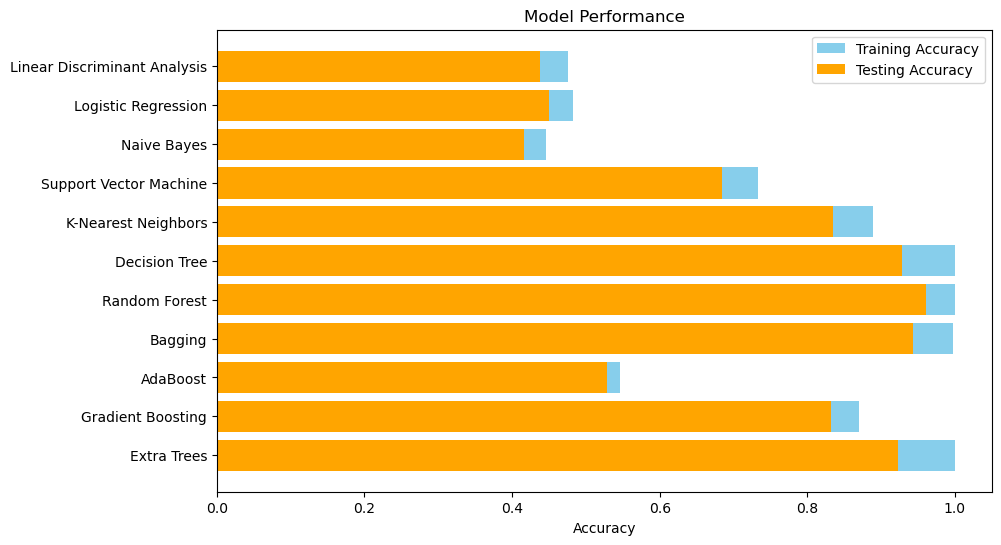

In [80]:
#USE DIFFERENT DIFFERNT MODEL TO CHECK THE ACCURACY(TRAINING AND TESTING ACCURACY).
#I WILL USE ONLY THOSE MODEL FOR FURTHER STEP(TRAINING STAGE)WHICH GIVE PROPER VALUE OF ACCURACY
#BECAUSE THE MODEL WHICH GIVE PROPER ACCURACY CAN PREDICT THE RESULT IN BETTER WAY
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
# Training accuracies
train_accuracies = []
test_accuracies = []
print('Accuracy Comparison :-\n')
for name, model in models.items():
    model.fit(X_train, Y_train)
    # Training accuracy
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracies.append(train_accuracy)
    
    # Testing accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies.append(test_accuracy)
    print(f'{name}:')
    print(f'trainAccuracy: {train_accuracy:.4f}')
    print(f'testingAccuracy: {test_accuracy:.4f}')
    print('\n')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(models.keys()), train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(list(models.keys()), test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the model names at the top
plt.show()

# 

In [81]:
model=RandomForestClassifier()

In [82]:
GBC=model.fit(X_train,Y_train)

In [83]:
X_train_prediction=GBC.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)
training_accuracy

1.0

In [84]:
X_testing_prediction=GBC.predict(X_test)
testing_accuracy=accuracy_score(X_testing_prediction,Y_test)
testing_accuracy

0.9652333028362305

Text(50.722222222222214, 0.5, 'Actual')

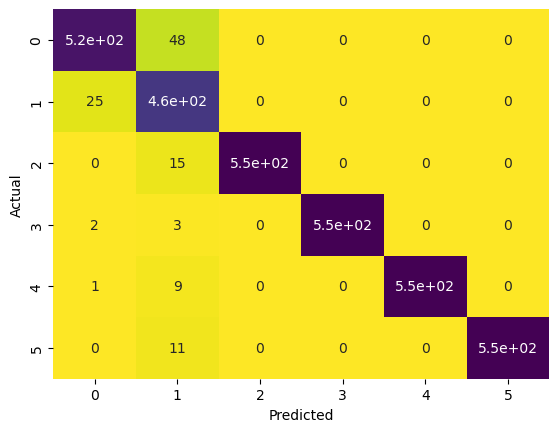

In [85]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(X_testing_prediction,Y_test) 
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=GBC.classes_, xticklabels=GBC.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [86]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       546
           1       0.95      0.84      0.89       547
           2       0.97      1.00      0.99       547
           3       0.99      1.00      1.00       547
           4       0.98      1.00      0.99       546
           5       0.98      1.00      0.99       546

    accuracy                           0.97      3279
   macro avg       0.97      0.97      0.96      3279
weighted avg       0.97      0.97      0.96      3279



/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_82763/963696518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
/var/folders/jp/52lg7vhx5xqc9l1fx_d3rk300000gn/T/ipykernel_82763/963696518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

Text(0.5, 1.0, 'Random Forest')

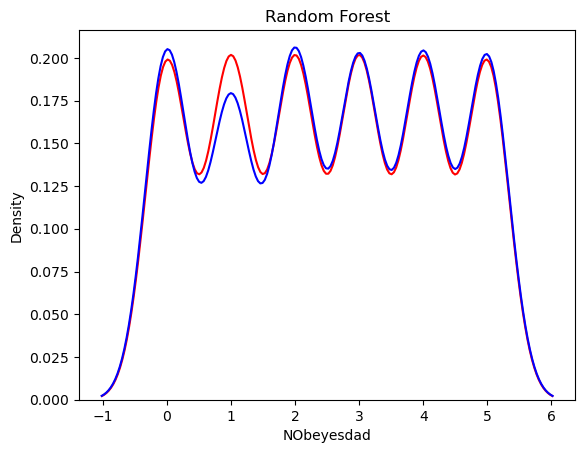

In [87]:
ax=sns.distplot(Y_test,hist=False,color="r",label="Actual value")
sns.distplot(X_testing_prediction,hist=False,color="b",label="Predicted value",ax=ax)
plt.title('Random Forest')

In [88]:
input_data=X.iloc[0]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
# std_data=scalers.transform(std_data)
# print(std_data)
prediction=GBC.predict(std_data)#model=logisticregression
print("target:",prediction)
if(prediction==0):
    print("Insufficient Weight")
elif(prediction==1):
    print("Normal weight")
elif(prediction==2):
    print("Obseity Type I")
elif(prediction==3):
    print("Obseity Type II")
elif(prediction==4):
    print("Obseity Type III")
elif(prediction==5):
    print("overweight_level I")
elif(prediction==6):
    print("overweight_level II")    

[[1.         0.04854369 0.8        0.42622951 0.         1.
  0.33333333 0.33333333 0.66666667 0.         0.5        0.
  0.14285714 0.30769231 1.         0.75      ]]
target: [1]
Normal weight


/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [89]:
Y

0       1
1       1
2       1
3       1
4       0
       ..
8191    5
8192    5
8193    5
8194    5
8195    5
Name: NObeyesdad, Length: 8196, dtype: int64

In [90]:
# Initialize counts for each condition
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

Insufficientweight_count = 0
Normalweight_count = 0
Obseitytype1_count = 0
obseitytype2_count = 0
obseitytype3_count = 0
overweightlevelI_count = 0
overweightlevelII_count = 0

# Iterate over each instance in the dataset
for index, input_data in X.iterrows():
    # Convert input data to a numpy array and reshape it
    input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
    # Standardize the input data
    std_data = scalers.transform(input_data_as_numpy_array)
    #std_data=Std.transform(std_data)
    # Make predictions
    prediction=GBC.predict(std_data)#model=logisticregression
    print("target:",prediction)
    if(prediction==0):
      print("Insufficient Weight")
      Insufficientweight_count +=1
    elif(prediction==1):
      print("Normal weight")
      Normalweight_count +=1
    elif(prediction==2):
      print("Obseity Type I")
      Obseitytype1_count +=1
    elif(prediction==3):
      print("Obseity Type II")
      obseitytype2_count +=1
    elif(prediction==4):
      print("Obseity Type III")
      obseitytype3_count +=1
    elif(prediction==5):
      print("overweight_level I")
      overweightlevelI_count +=1
    elif(prediction==6):
      print("overweight_level II")
      overweightlevelII_count +=1

# Print counts for each condition
print("Number of instances in each condition:")
print("Insufficient Weight:", Insufficientweight_count)
print("Normal weight:", Normalweight_count)
print("Insufficient Weight:", Insufficientweight_count)
print("Obseitytype1:", Obseitytype1_count)
print("obseitytype2:", obseitytype2_count)
print("obseitytype3:", obseitytype3_count)
print("overweightlevel1:", overweightlevelI_count)
print("overweightlevel2:", overweightlevelII_count)


target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [2]
Obseity Type I
target: [4]
Obseity Type III
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [5]
overweight_level I
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [4]
Obseity Type III
target: [5]
overweight_level I
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [4]
Obseity Type III
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [3]
Obseity Type II
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal w

target: [1]
Normal weight
target: [5]
overweight_level I
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [2]
Obseity Type I
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [3]
Obseity Type II
target: [1]
Normal weight
target: [1]
Normal weight
target

target: [1]
Normal weight
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [1]
Normal weight
target: [1]
Normal weight
target: [4]
Obseity Type III
target: [1]
Normal weight
target: [2]
Obseity Type I
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [2]
Obseity Type I
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [2]
Obseity Type I
target: [3]
Obseity Type II
target: [4]
Obseity Type III
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [2]
Obseity Type I
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
ta

target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [2]
Obseity Type I
target: [1]
Normal weight
target: [4]
Obseity Type III
target: [0]
Insufficient Weight
target: [2]
Obseity Type I
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [3]
Obseity Type II
target: [2]
Obseity Type I
target: [0]
Insufficient Weight
target: [5]
overweight_level I
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [4]
Obseity Type III
target: [2]
Obseity Type I
target: [5]
overweight_level I
target

target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [2]
Obseity Type I
target: [0]
Insufficient Weight
target: [4]
Obseity Type III
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [0]
Insufficient Weight
target: [5]
overweight_level I
target: [0]
Insufficient Weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [2]
Obseity Type I
target: [4]
Obseity Type III
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [1]
Normal weight
target: [5]
overweight_level I
target: [1]
Normal weigh

target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: [0]
Insufficient Weight
target: 

target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
t

target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
t

target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
target: [2]
Obseity Type I
t

target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity 

target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity Type II
target: [3]
Obseity 

target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Ob

target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Obseity Type III
target: [4]
Ob

target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: 

target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: [5]
overweight_level I
target: 

In [91]:
y_resampled.value_counts()

NObeyesdad
1    1366
0    1366
2    1366
4    1366
5    1366
3    1366
Name: count, dtype: int64

## Now making a model to predict whether the person is consuming alcohol or not on the basis of his weight ,age, height, and obesity type.

In [92]:
X1=ap.drop('CALC',axis=1)

In [93]:
Y1=ap['CALC']

In [94]:
Y1.value_counts()

CALC
2    1869
1     228
0      15
Name: count, dtype: int64

In [95]:
#import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X1, Y1)

In [96]:
y_resampled.value_counts()

CALC
2    1869
1    1869
0    1869
Name: count, dtype: int64

In [97]:
X1,Y1=X_resampled, y_resampled 

In [98]:
X1.shape

(5607, 16)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xt=scalers.fit_transform(X1)

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(Xt,Y1,test_size=0.2,random_state=42,stratify=Y1)

Accuracy Comparison :-

Linear Discriminant Analysis:
trainAccuracy: 0.6464
testingAccuracy: 0.6613


Logistic Regression:
trainAccuracy: 0.6796
testingAccuracy: 0.6952


Naive Bayes:
trainAccuracy: 0.6227
testingAccuracy: 0.6328


Support Vector Machine:
trainAccuracy: 0.8664
testingAccuracy: 0.8369


K-Nearest Neighbors:
trainAccuracy: 0.9302
testingAccuracy: 0.9020


Decision Tree:
trainAccuracy: 1.0000
testingAccuracy: 0.9661


Random Forest:
trainAccuracy: 1.0000
testingAccuracy: 0.9911


Bagging:
trainAccuracy: 0.9982
testingAccuracy: 0.9697


AdaBoost:
trainAccuracy: 0.7215
testingAccuracy: 0.7121




/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
trainAccuracy: 0.9387
testingAccuracy: 0.9091


Extra Trees:
trainAccuracy: 1.0000
testingAccuracy: 0.9554




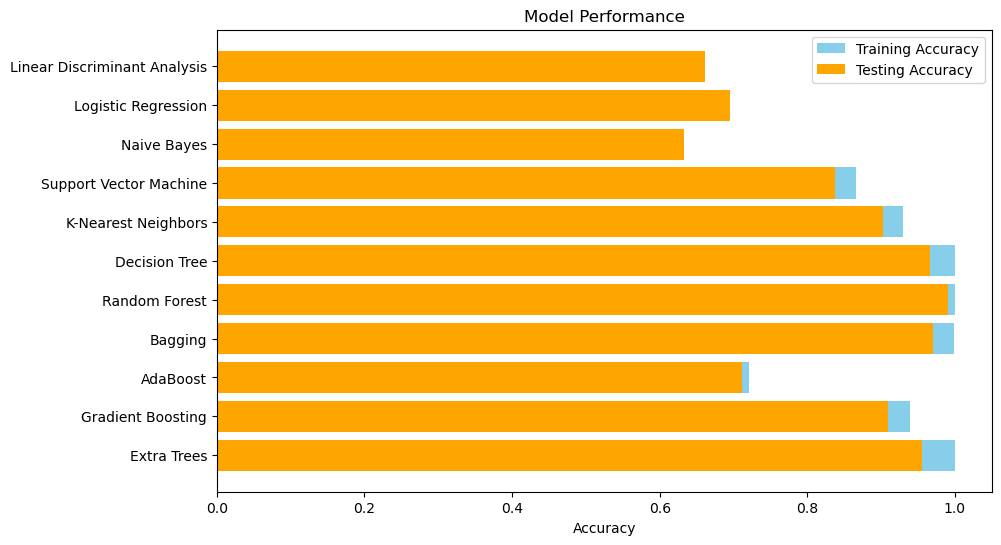

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
# Training accuracies
train_accuracies = []
test_accuracies = []
print('Accuracy Comparison :-\n')
for name, model in models.items():
    model.fit(X_train, Y_train)
    # Training accuracy
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracies.append(train_accuracy)
    
    # Testing accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies.append(test_accuracy)
    print(f'{name}:')
    print(f'trainAccuracy: {train_accuracy:.4f}')
    print(f'testingAccuracy: {test_accuracy:.4f}')
    print('\n')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(models.keys()), train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(list(models.keys()), test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the model names at the top
plt.show()
# print("TRAINING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     X_train_prediction = model.predict(X_train)
#     trainacc = accuracy_score( X_train_prediction, Y_train)
#     print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
# #for testing  data  
# print("TESTING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_test)
#     testacc = accuracy_score(Y_test, y_pred)
#     print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

In [102]:
#The best testing accuracy is provided by Random Forest Classifier
model=RandomForestClassifier()
rfc=model.fit(X_train,Y_train)

In [103]:
X_train_prediction=rfc.predict(X_train).round()
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [104]:
print(X_train_prediction)

[1 1 0 ... 2 2 2]


In [105]:
print(training_data_accuracy)

1.0


In [106]:
X_test_prediction=rfc.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.9875222816399287


In [107]:
from sklearn import metrics
# Print the confusion matrix
metrics.confusion_matrix(Y_test, X_test_prediction)

array([[374,   0,   0],
       [  0, 374,   0],
       [  0,  14, 360]])

In [108]:
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       374
           1       0.96      1.00      0.98       374
           2       1.00      0.96      0.98       374

    accuracy                           0.99      1122
   macro avg       0.99      0.99      0.99      1122
weighted avg       0.99      0.99      0.99      1122



Text(0.5, 0, 'Alcohol Consumption')

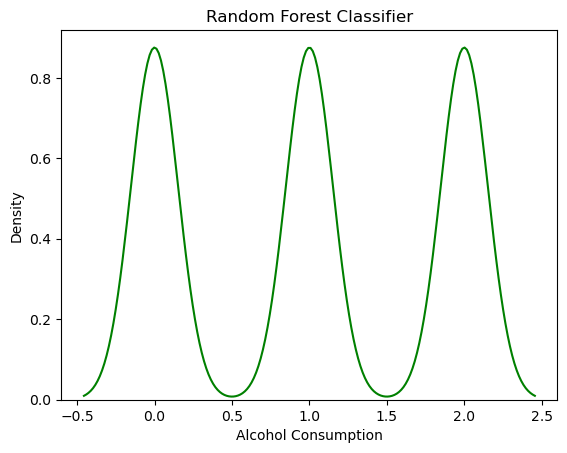

In [109]:
sns.distplot(X_train_prediction,hist=False,color="g",label="Predicted value")
plt.title('Random Forest Classifier')
plt.xlabel('Alcohol Consumption')

In [110]:
input_data=X1.iloc[4]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
# std_data=scalers.transform(std_data)
# print(std_data)
prediction=rfc.predict(std_data)#model=logisticregression
print("target:",prediction)
if(prediction==0):
    print("Always")
elif(prediction==1):
    print("Frequently")
elif(prediction==2):
    print("Sometimes")
elif(prediction==3):
    print("No")

[[0.         0.02912621 0.6        0.14754098 1.         1.
  0.33333333 0.33333333 0.66666667 0.         0.5        0.
  1.         0.26923077 1.         0.        ]]
target: [2]
Sometimes


In [111]:
Y1.head

<bound method NDFrame.head of 0       2
1       2
2       2
3       1
4       2
       ..
5602    1
5603    1
5604    1
5605    1
5606    1
Name: CALC, Length: 5607, dtype: int64>

In [112]:
always_count = 0
frequently_count = 0
sometimes_count = 0
No_couunt =0


# Iterate over each instance in the dataset
for index, input_data in X1.iterrows():
    # Convert input data to a numpy array and reshape it
    input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
    # Standardize the input data
    std_data = scalers.transform(input_data_as_numpy_array)
    #std_data=Std.transform(std_data)
    # Make predictions
    prediction=rfc.predict(std_data)#model=logisticregression
    print("target:",prediction)
    if(prediction==0):
      print("Frequently")
      frequently_count +=1
    elif(prediction==1):
      print("Sometimes")
      sometimes_count +=1
    elif(prediction==2):
      print("No")
      No_couunt +=1
    elif(prediction==3):
      print("Always")
      always_count +=1

# Print counts for each condition
print("Number of instances in each condition:")
print("Always consuming alchol:", always_count)
print("Frequently consuming alchol:", frequently_count)
print("Sometimes consuming alchol:", sometimes_count)
print("Not Consuming alchol:", No_couunt)



target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No

target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [0]
Frequently
target: [1]
Sometimes
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [1]
Sometimes
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target

target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [1]
Sometimes
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
target: [2]
No
targ

target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]

target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]
Frequently
target: [0]

target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1

target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1]
Sometimes
target: [1

In [113]:
Y1.value_counts()

CALC
2    1869
1    1869
0    1869
Name: count, dtype: int64

# Now making a model for predicting whether the person smokes or not

In [114]:
X2=ap.drop('SMOKE',axis=1)

In [115]:
X2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,20.0,1.73736,65.0,0,1,2,2,2,3.0,0,1,5.0,2,3,1
1,1,22.0,1.79832,58.0,0,0,2,1,2,3.0,1,7,3.5,2,4,1
2,1,23.0,1.70688,65.0,0,0,2,2,1,5.0,0,6,4.5,2,3,1
3,1,18.0,1.73736,58.0,1,1,2,2,2,3.5,1,5,7.0,1,4,1
4,0,19.0,1.61544,48.0,1,1,2,2,2,3.0,0,7,4.5,2,4,0


In [116]:
Y2=ap['SMOKE']

In [117]:
Y2.value_counts()

SMOKE
0    1936
1     176
Name: count, dtype: int64

In [118]:
#import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X2, Y2)

In [119]:
X2,Y2=X_resampled, y_resampled

In [120]:
Y2.value_counts()

SMOKE
0    1936
1    1936
Name: count, dtype: int64

In [121]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xt=scalers.fit_transform(X2)

In [122]:
Xt

array([[1.        , 0.04854369, 0.8       , ..., 1.        , 0.75      ,
        0.2       ],
       [1.        , 0.08737864, 0.9       , ..., 1.        , 1.        ,
        0.2       ],
       [1.        , 0.10679612, 0.75      , ..., 1.        , 0.75      ,
        0.2       ],
       ...,
       [1.        , 0.02912621, 0.8       , ..., 1.        , 1.        ,
        0.2       ],
       [1.        , 0.02912621, 0.65      , ..., 1.        , 0.5       ,
        0.8       ],
       [1.        , 0.02912621, 0.8       , ..., 1.        , 1.        ,
        0.2       ]])

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(Xt,Y2,test_size=0.2,random_state=42,stratify=Y2)

Accuracy Comparison :-

Linear Discriminant Analysis:
trainAccuracy: 0.7381
testingAccuracy: 0.7316


Logistic Regression:
trainAccuracy: 0.7362
testingAccuracy: 0.7252


Naive Bayes:
trainAccuracy: 0.7246
testingAccuracy: 0.7174


Support Vector Machine:
trainAccuracy: 0.8418
testingAccuracy: 0.8168


K-Nearest Neighbors:
trainAccuracy: 0.9235
testingAccuracy: 0.9019


Decision Tree:
trainAccuracy: 1.0000
testingAccuracy: 0.9652


Random Forest:
trainAccuracy: 1.0000
testingAccuracy: 0.9858


Bagging:
trainAccuracy: 0.9994
testingAccuracy: 0.9742


AdaBoost:
trainAccuracy: 0.7937
testingAccuracy: 0.7729




/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
trainAccuracy: 0.9028
testingAccuracy: 0.8645


Extra Trees:
trainAccuracy: 1.0000
testingAccuracy: 0.9677




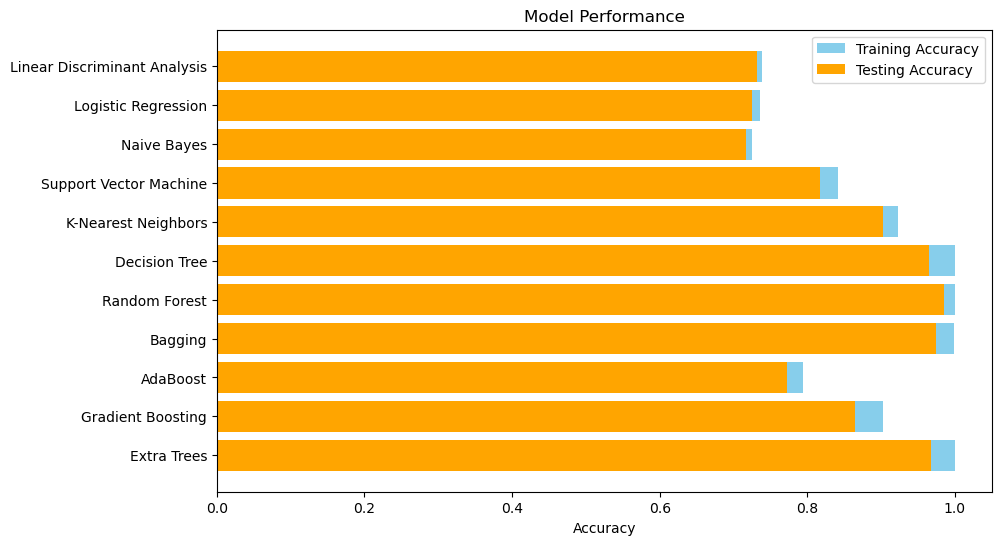

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
results=[]
names=[]
# create instances of all models
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}
from sklearn.metrics import accuracy_score
# Training accuracies
train_accuracies = []
test_accuracies = []
print('Accuracy Comparison :-\n')
for name, model in models.items():
    model.fit(X_train, Y_train)
    # Training accuracy
    X_train_prediction = model.predict(X_train)
    train_accuracy = accuracy_score(X_train_prediction, Y_train)
    train_accuracies.append(train_accuracy)
    
    # Testing accuracy
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, y_pred)
    test_accuracies.append(test_accuracy)
    print(f'{name}:')
    print(f'trainAccuracy: {train_accuracy:.4f}')
    print(f'testingAccuracy: {test_accuracy:.4f}')
    print('\n')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(models.keys()), train_accuracies, color='skyblue', label='Training Accuracy')
plt.barh(list(models.keys()), test_accuracies, color='orange', label='Testing Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to have the model names at the top
plt.show()
# print("TRAINING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     X_train_prediction = model.predict(X_train)
#     trainacc = accuracy_score( X_train_prediction, Y_train)
#     print(f'{name}:\ntrainAccuracy: {trainacc:.4f}')
# #for testing  data  
# print("TESTING ACCURACY:")
# for name, model in models.items():
#     model.fit(X_train, Y_train)
#     y_pred = model.predict(X_test)
#     testacc = accuracy_score(Y_test, y_pred)
#     print(f'{name}:\ntestingAccuracy: {testacc:.4f}') 

In [125]:
model2=RandomForestClassifier()
rfc1=model2.fit(X_train,Y_train)

In [126]:
X_train_prediction=rfc1.predict(X_train).round()
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [127]:
print(training_data_accuracy)

1.0


In [128]:
X_test_prediction=rfc1.predict(X_test).round()#that is Ypred also
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.9858064516129033


In [129]:
from sklearn import metrics
# Print the confusion matrix
metrics.confusion_matrix(Y_test, X_test_prediction)

array([[377,  11],
       [  0, 387]])

In [130]:
print(metrics.classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       388
           1       0.97      1.00      0.99       387

    accuracy                           0.99       775
   macro avg       0.99      0.99      0.99       775
weighted avg       0.99      0.99      0.99       775



Text(0.5, 0, 'Smoking Status')

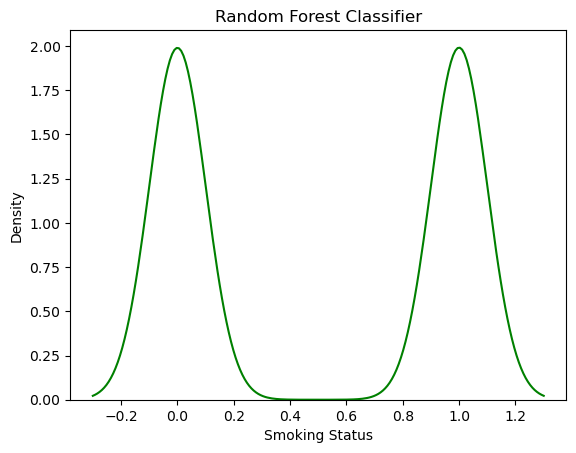

In [131]:
sns.distplot(X_train_prediction,hist=False,color="g",label="Predicted value")
plt.title('Random Forest Classifier')
plt.xlabel('Smoking Status')

In [132]:
input_data=X2.iloc[0]
#changing the input data to a numpy arrary
input_data_as_numpy_array=np.asarray(input_data)
#reshape the np array s we are predictive for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
#as i already standarize the data so here for input value we once standarize this
std_data=scalers.transform(input_data_reshaped)
print(std_data)
# std_data=scalers.transform(std_data)
# print(std_data)
prediction=rfc1.predict(std_data)
print("target:",prediction)
if(prediction==0):
    print("NO")
elif(prediction==1):
    print("Yes")

[[1.         0.04854369 0.8        0.42622951 0.         1.
  0.33333333 0.33333333 0.66666667 0.5        0.         0.14285714
  0.30769231 1.         0.75       0.2       ]]
target: [0]
NO


In [134]:
smoking_yes_count = 0
smoking_no_count = 0

# Iterate over each instance in the dataset
for index, input_data in X2.iterrows():
    # Convert input data to a numpy array and reshape it
    input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
    # Standardize the input data
    std_data = scalers.transform(input_data_as_numpy_array)
    #std_data=Std.transform(std_data)
    # Make predictions
    prediction=rfc1.predict(std_data)#model=logisticregression
    print("target:",prediction)
    if(prediction==0):
      print("NO")
      smoking_no_count += 1
    elif(prediction==1):
      print("Yes")
      smoking_yes_count +=1

# Print counts for each condition
print("Number of instances in each condition:")
print("Smoker:", smoking_yes_count)
print("Not Smoker:", smoking_no_count)




target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
targe

target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
ta

target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [1]
Yes
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [0]
NO
target: [1]
Yes
targe

target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: 

target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: 

target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: [1]
Yes
target: 

In [135]:
Y2.value_counts()

SMOKE
0    1936
1    1936
Name: count, dtype: int64